# 0.0. IMPORTS

In [1]:
import pandas as pd
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt

import datetime 



from IPython.core.display import HTML
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

### 0.1. Helper Functions

In [86]:
def my_settings():
    %matplotlib inline
    
    # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 8
 
    # notebook settings
    display(HTML('<style>.container{width:100% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    # seaborn settings
    sns.set(rc={'figure.figsize':(25,12)})
    sns.set_theme(style = 'darkgrid', font_scale = 1)

In [87]:
my_settings()

### 0.2. Loading Data

In [4]:
df_sales_raw = pd.read_csv('data/train.csv' , low_memory = False)
df_store_raw = pd.read_csv('data/store.csv' , low_memory = False)

# merge

df_raw = pd.merge(df_sales_raw , df_store_raw , how = 'left' , on = 'Store')

In [5]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


# 1.0. DESCRICAO DOS DADOS


### 1.1. Rename Columns

In [6]:
df1 = df_raw.copy()

In [7]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase , cols_old))

# rename

df1.columns = cols_new



In [9]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

### 1.2. Data Dimensions

In [10]:
print( ' Number of rows: {}'.format(df1.shape[0]))
print( ' Number of rows: {}'.format(df1.shape[1]))


 Number of rows: 1017209
 Number of rows: 18


### 1.3. Data Types

In [11]:
df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4. Check NA

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5. Fillout NA

In [13]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
304510,969,1,2014-10-20,3834,639,1,1,0,0,a,c,600.00,11.00,1999.00,1,10.00,2013.00,"Jan,Apr,Jul,Oct"


In [14]:
df1['competition_distance'].max()

75860.0

In [15]:
# competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x) 

# competition_open_since_month    
df1['competition_open_since_month']= df1.apply(lambda x :x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'] , axis = 1)

# competition_open_since_year     
df1['competition_open_since_year']= df1.apply(lambda x :x['date'].year  if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'] , axis = 1)

# promo2_since_week  
df1['promo2_since_week']= df1.apply(lambda x :x['date'].week  if math.isnan(x['promo2_since_week']) else x['promo2_since_week'] , axis = 1)

# promo2_since_year 
df1['promo2_since_year']= df1.apply(lambda x :x['date'].year  if math.isnan(x['promo2_since_year']) else x['promo2_since_year'] , axis = 1)

# promo_interval  
month_map = {1 : 'Jan' ,2 : 'Fev' ,3 : 'Mar' ,4 : 'Apr' ,5 : 'May' ,6 : 'Jun' ,7 : 'Jul' ,8 : 'Aug' ,9 : 'Set' ,10 : 'Out' ,11 : 'Nov' ,12 : 'Dez' }

df1['promo_interval'].fillna(0 , inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0 , axis = 1)


In [16]:
df1.sample(5).T

,832481,850966,316899,686323,779598
store,362,1007,131,269,999
day_of_week,6,4,1,4,5
date,2013-06-15 00:00:00,2013-05-30 00:00:00,2014-10-06 00:00:00,2013-10-24 00:00:00,2013-08-02 00:00:00
sales,7376,7191,6539,8425,10615
customers,1006,730,641,1242,767
open,1,1,1,1,1
promo,0,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,0,0,1,1,1
store_type,c,c,c,a,d


In [17]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### 1.6. Change Types

In [18]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

### 1.7. Descriptive Statistical 

In [19]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'] )

#### 1.7.1. Numerical Attributes

In [20]:
# Central tendency - mean , median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std , min , max , range , skew , kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns =['attributes','min','max','range','mean','median','std','skew','kustosis']

In [21]:
m

,attributes,min,max,range,mean,median,std,skew,kustosis
0,store,1.00,1115.00,1114.00,558.43,558.00,321.91,-0.00,-1.20
1,day_of_week,1.00,7.00,6.00,4.00,4.00,2.00,0.00,-1.25
2,sales,0.00,41551.00,41551.00,5773.82,5744.00,3849.92,0.64,1.78
3,customers,0.00,7388.00,7388.00,633.15,609.00,464.41,1.60,7.09
4,open,0.00,1.00,1.00,0.83,1.00,0.38,-1.76,1.09
5,promo,0.00,1.00,1.00,0.38,0.00,0.49,0.49,-1.76
6,school_holiday,0.00,1.00,1.00,0.18,0.00,0.38,1.68,0.82
7,competition_distance,20.00,200000.00,199980.00,5935.44,2330.00,12547.65,10.24,147.79
8,competition_open_since_month,1.00,12.00,11.00,6.79,7.00,3.31,-0.04,-1.23
9,competition_open_since_year,1900.00,2015.00,115.00,2010.32,2012.00,5.52,-7.24,124.07


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

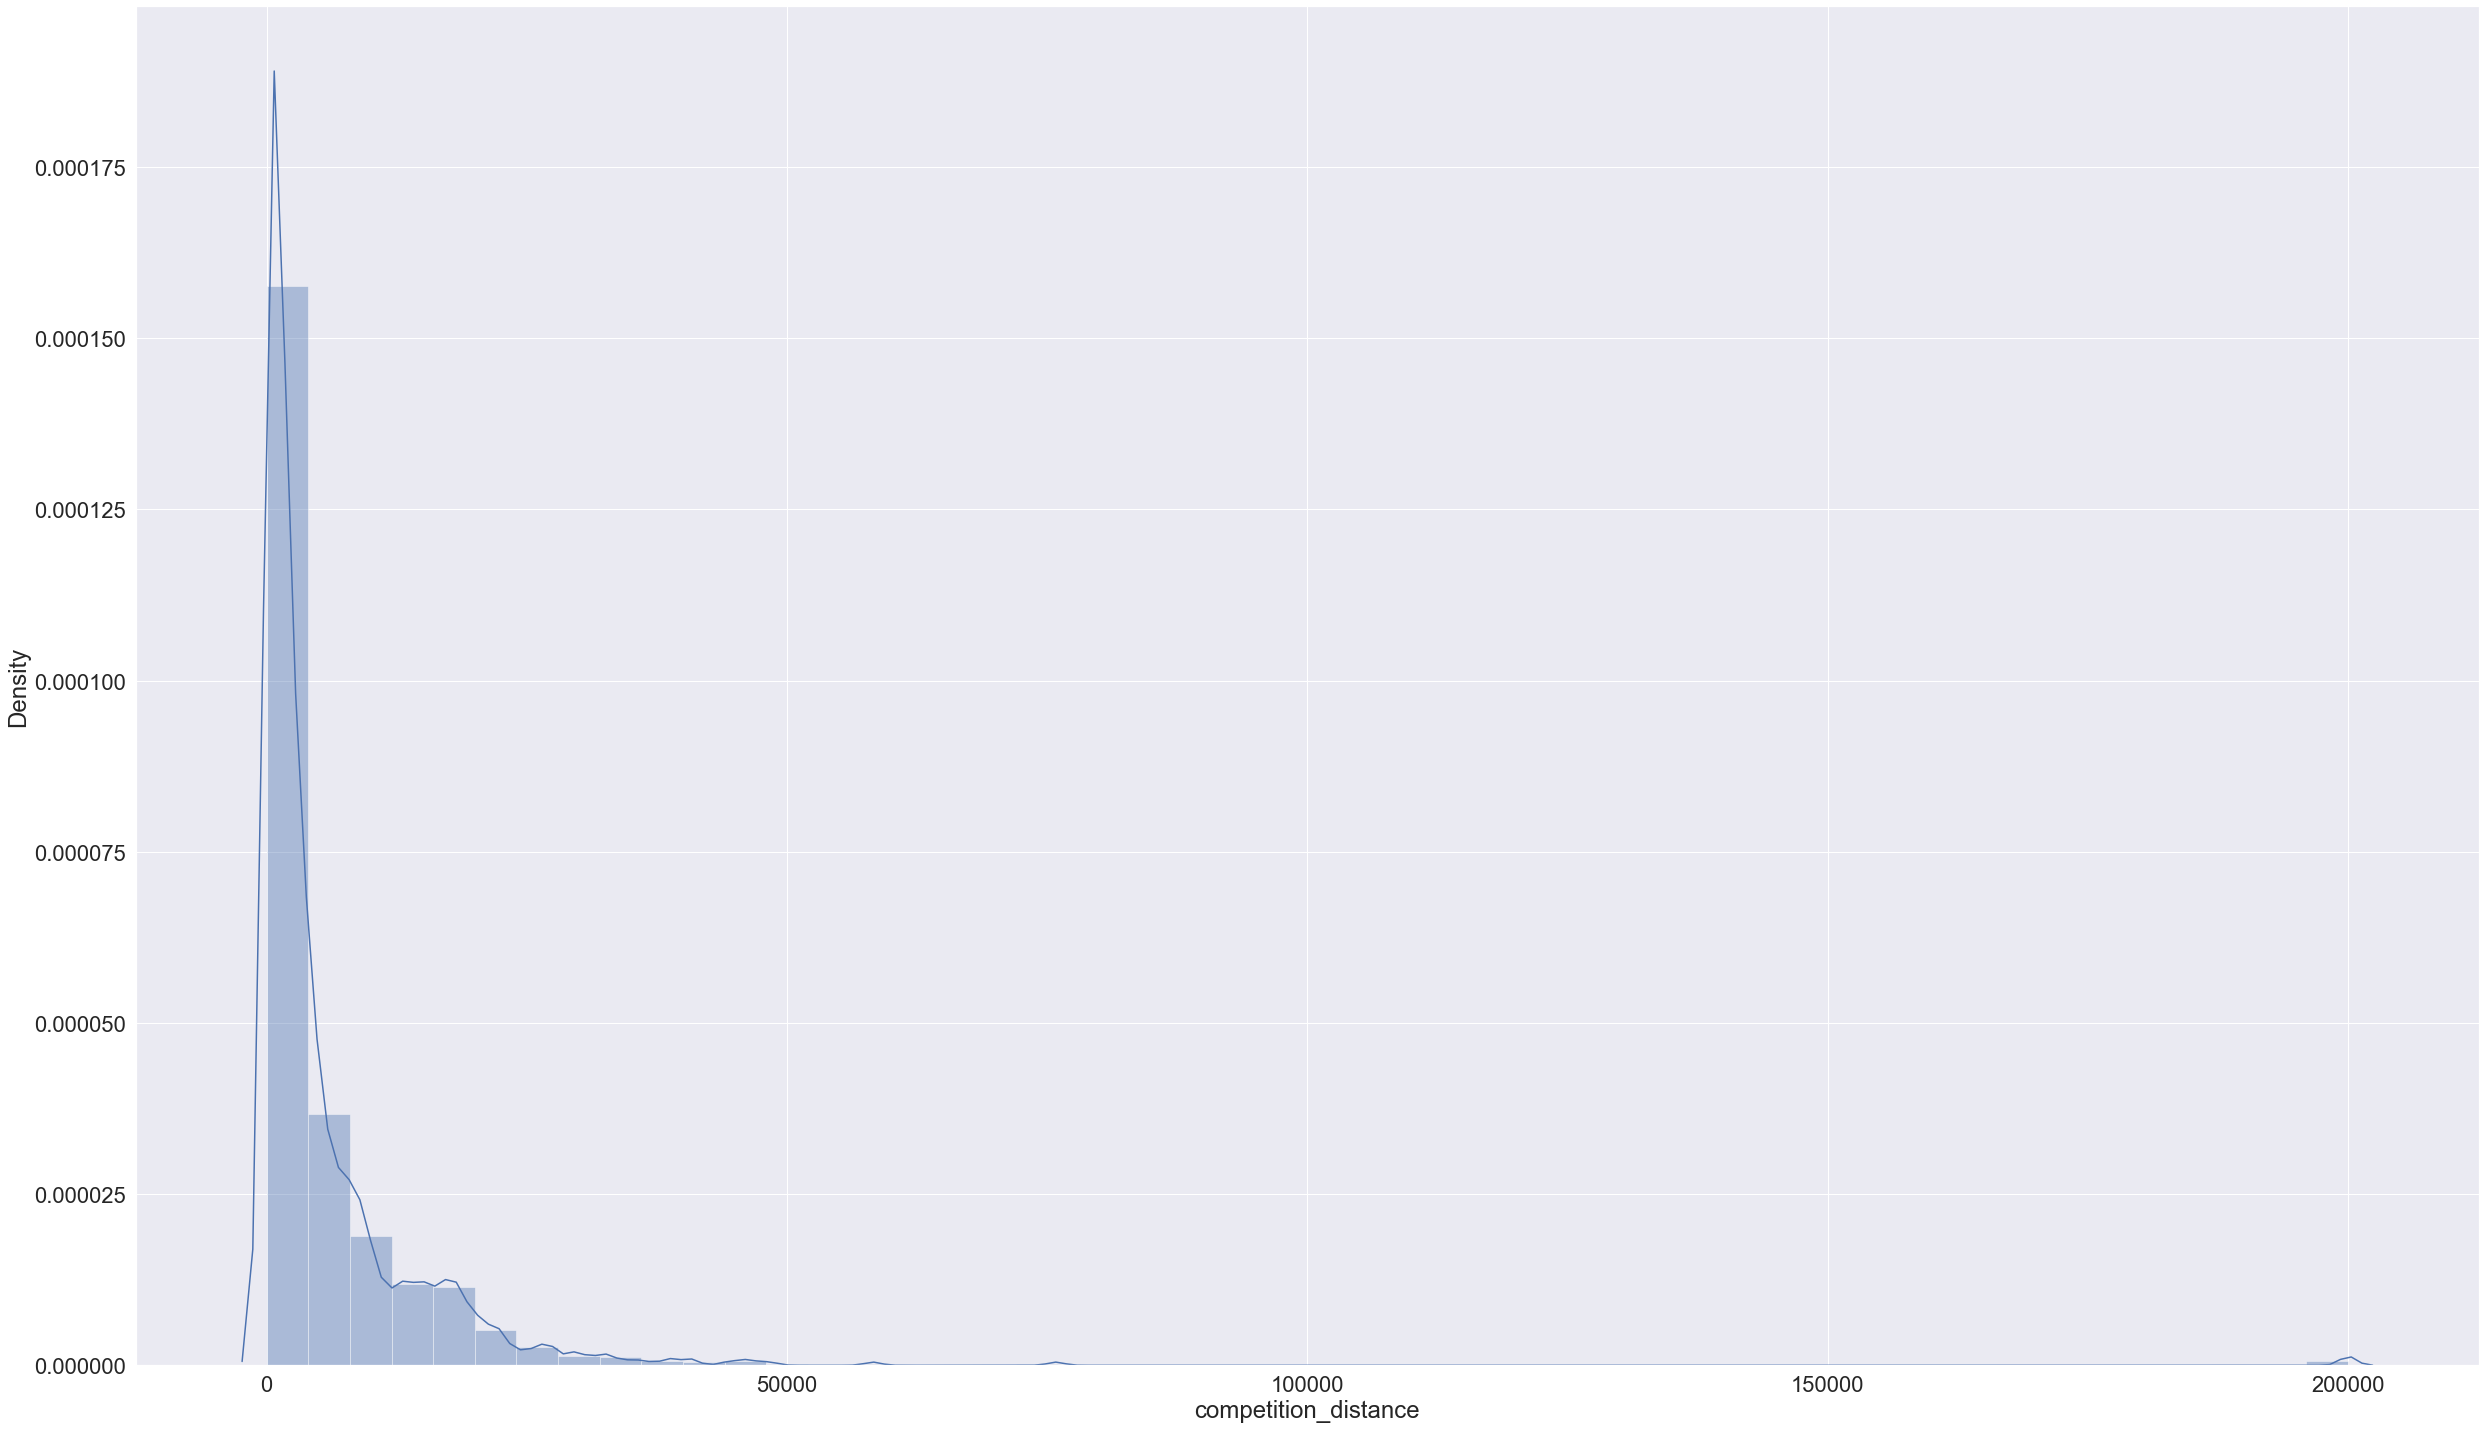

In [22]:
sns.distplot(df1['competition_distance'])


#### 1.7.2. Categorical Attributes

In [23]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

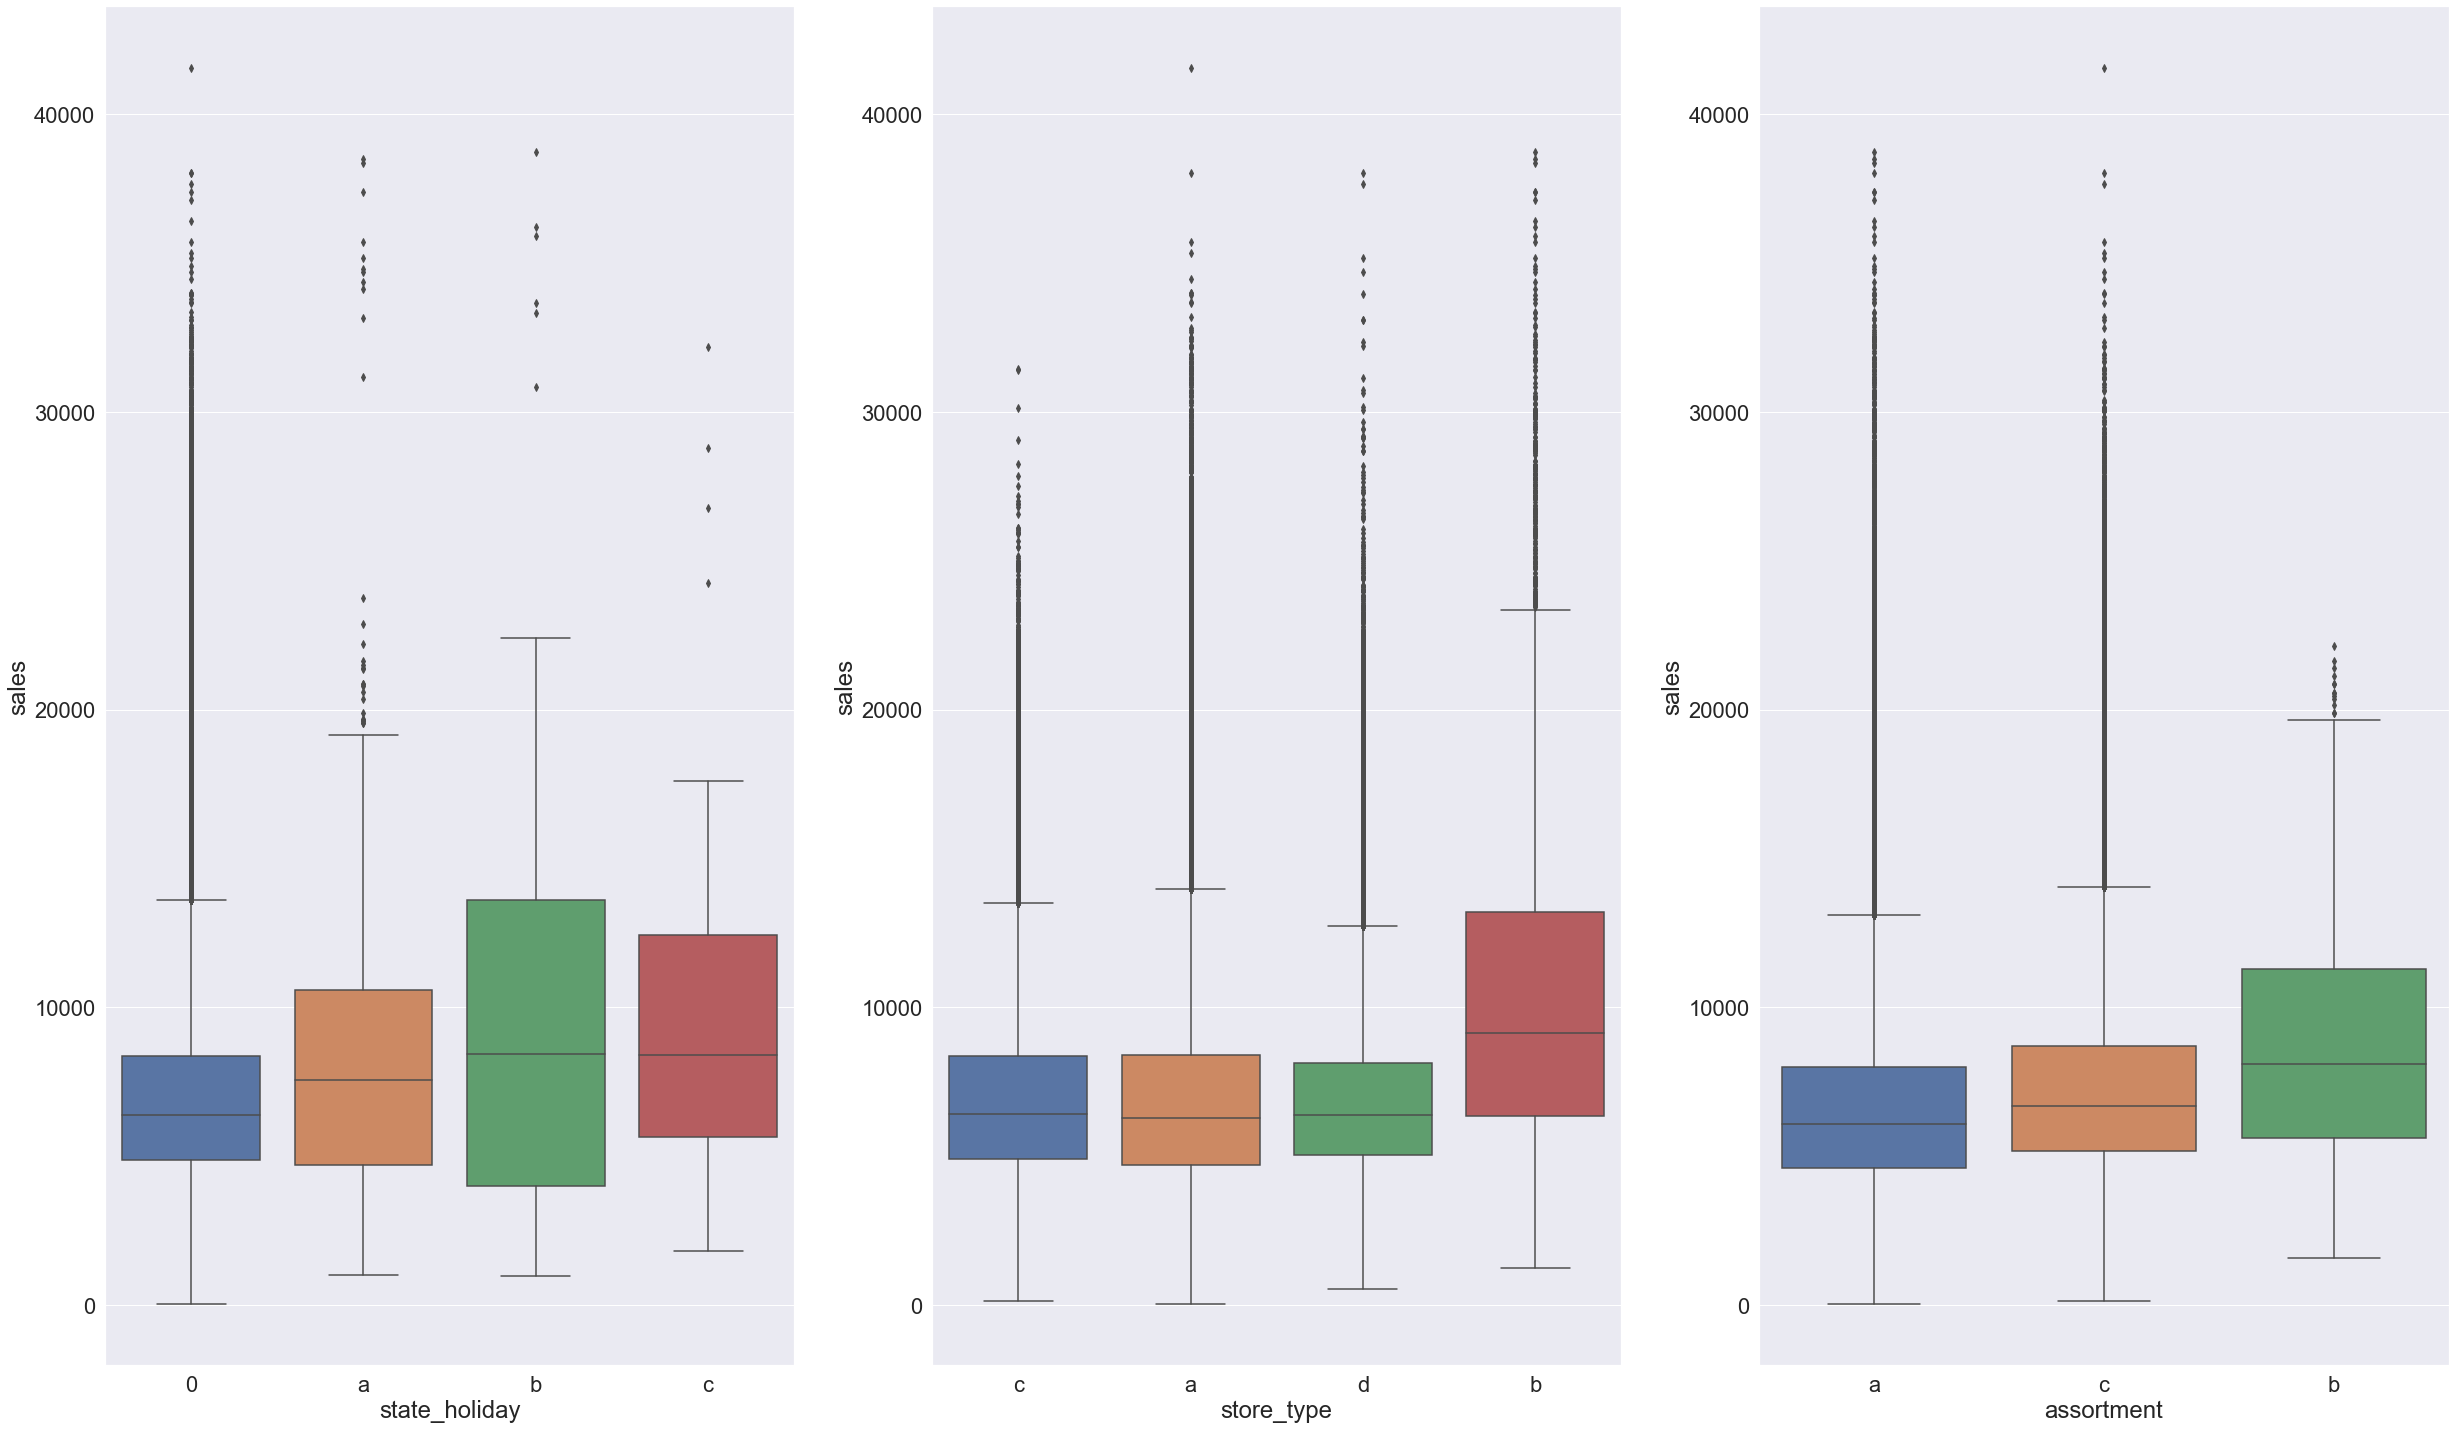

In [24]:
aux1 = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x ='state_holiday' , y ='sales' , data = aux1)

plt.subplot(1,3,2)
sns.boxplot(x ='store_type' , y ='sales' , data = aux1)

plt.subplot(1,3,3)
sns.boxplot(x ='assortment' , y ='sales' , data = aux1)

# 2.0. FEATURE ENGINEERING

In [25]:
df2 = df1.copy()

## 2.1. Mapa mental de Hipoteses

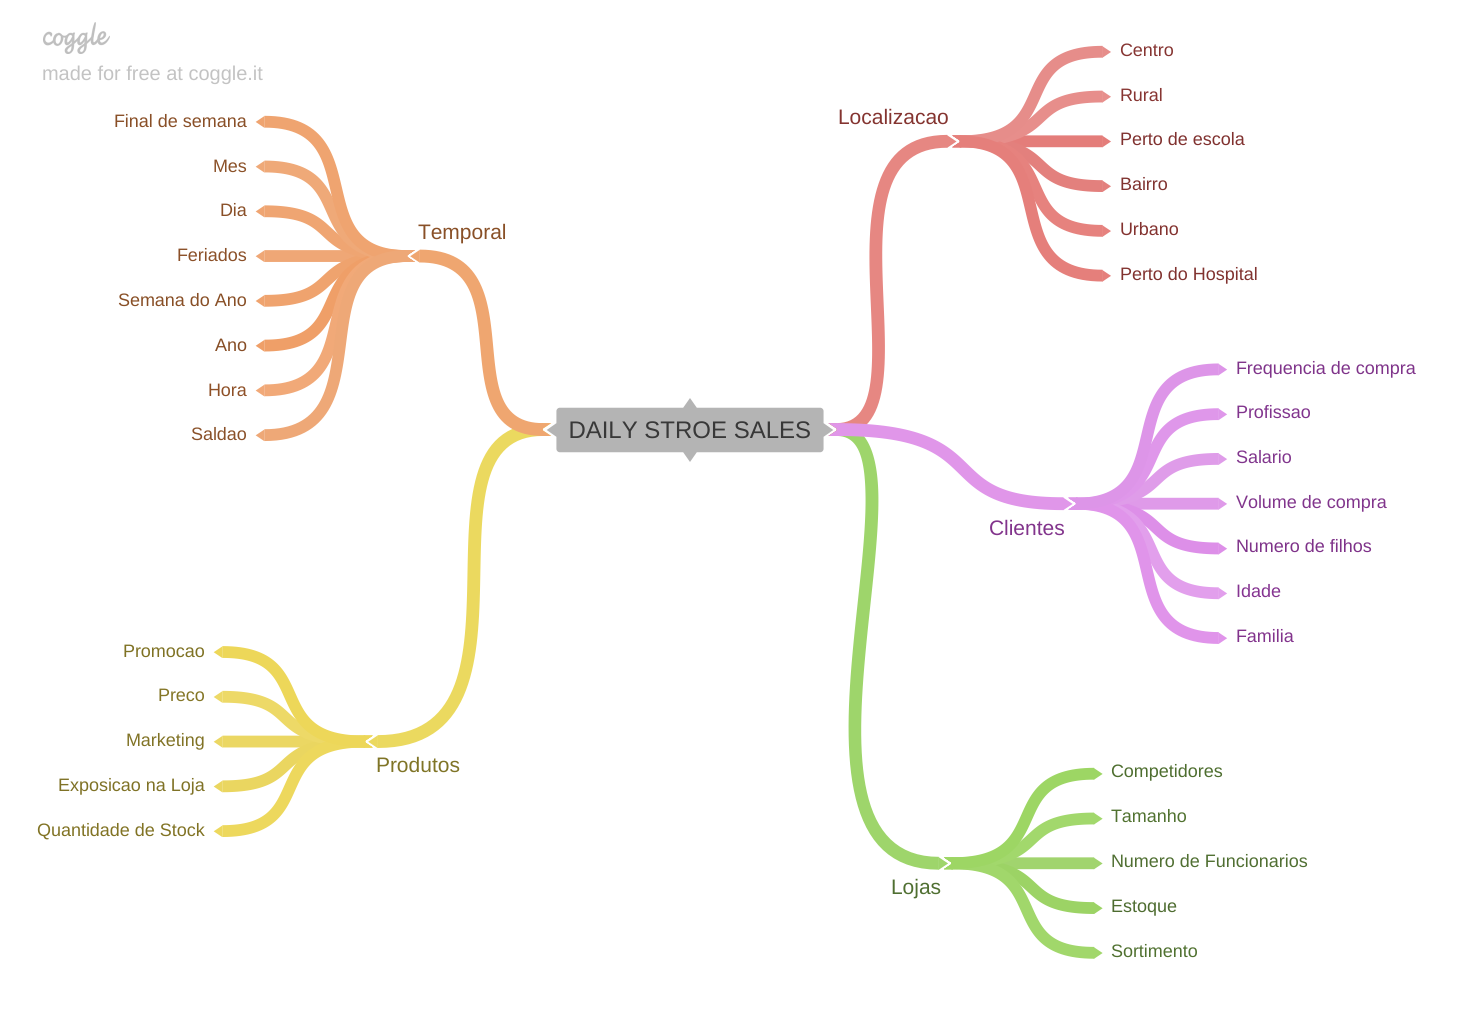

In [26]:
Image('img/MindMapHypothesys.png')

### 2.1.1. Hipotese Loja

**1.** Lojas com numero maior de funcionarios deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com menor estoque deveriam vender menos.

**5.** Lojas com maior sortimento deveriam vender mais.

**6.** Lojas com competidores proximos deveriam vender menos.

**7.** Lojas com competidores à mais tempo deveriam vender mais.

### 2.1.2. Hipoteses Produto

**1.** Lojas que investem mais em marketing deveriam vender mais.

**2.** Lojas com maior exposição de produtos deveriam vender mais.

**3.** Lojas com produtos com preços menores deveriam vender mais.

**4.** Lojas com promoções agressivas(descontos maiores) deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoções a deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.1.3. Hipotese Temporal

**1.** Lojas abertas durante feriado de Natal deveriam vender menos.

**2.** Lojas deveriam vender mais ao longo do ano.

**3.** Lojas deveriam vender mais no segundo semetre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender mais aos finais de semana.

**6.** Lojas deveriam vender menos durante feriados escolares.




## 2.2. Lista final das Hipoteses

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores proximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoções deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante feriado de Natal deveriam vender menos.

**8.** Lojas deveriam vender mais ao longo do ano.

**9.** Lojas deveriam vender mais no segundo semetre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender mais aos finais de semana.

**12.** Lojas deveriam vender menos durante feriados escolares.



## 2.3. Feature Engineering

In [55]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x : datetime.datetime( year = x['competition_open_since_year'], month = x['competition_open_since_month'], day=1 ), axis = 1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) +'-'+ df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x : datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#State Holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [28]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. FILTRAGEM DE VARIÁVEIS

In [58]:
df3 = df2.copy()

In [30]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_since_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


### 3.1. Filtragem das Linhas

In [31]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

### 3.2. Selecao das Colunas

In [32]:
cols_drop = ['customers', 'open','promo_interval','month_map']
df3 = df3.drop(cols_drop , axis = 1)

In [33]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_since_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 EXPLORATORY DATA ANALYSIS (EDA)

In [59]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

<AxesSubplot:xlabel='sales', ylabel='Density'>

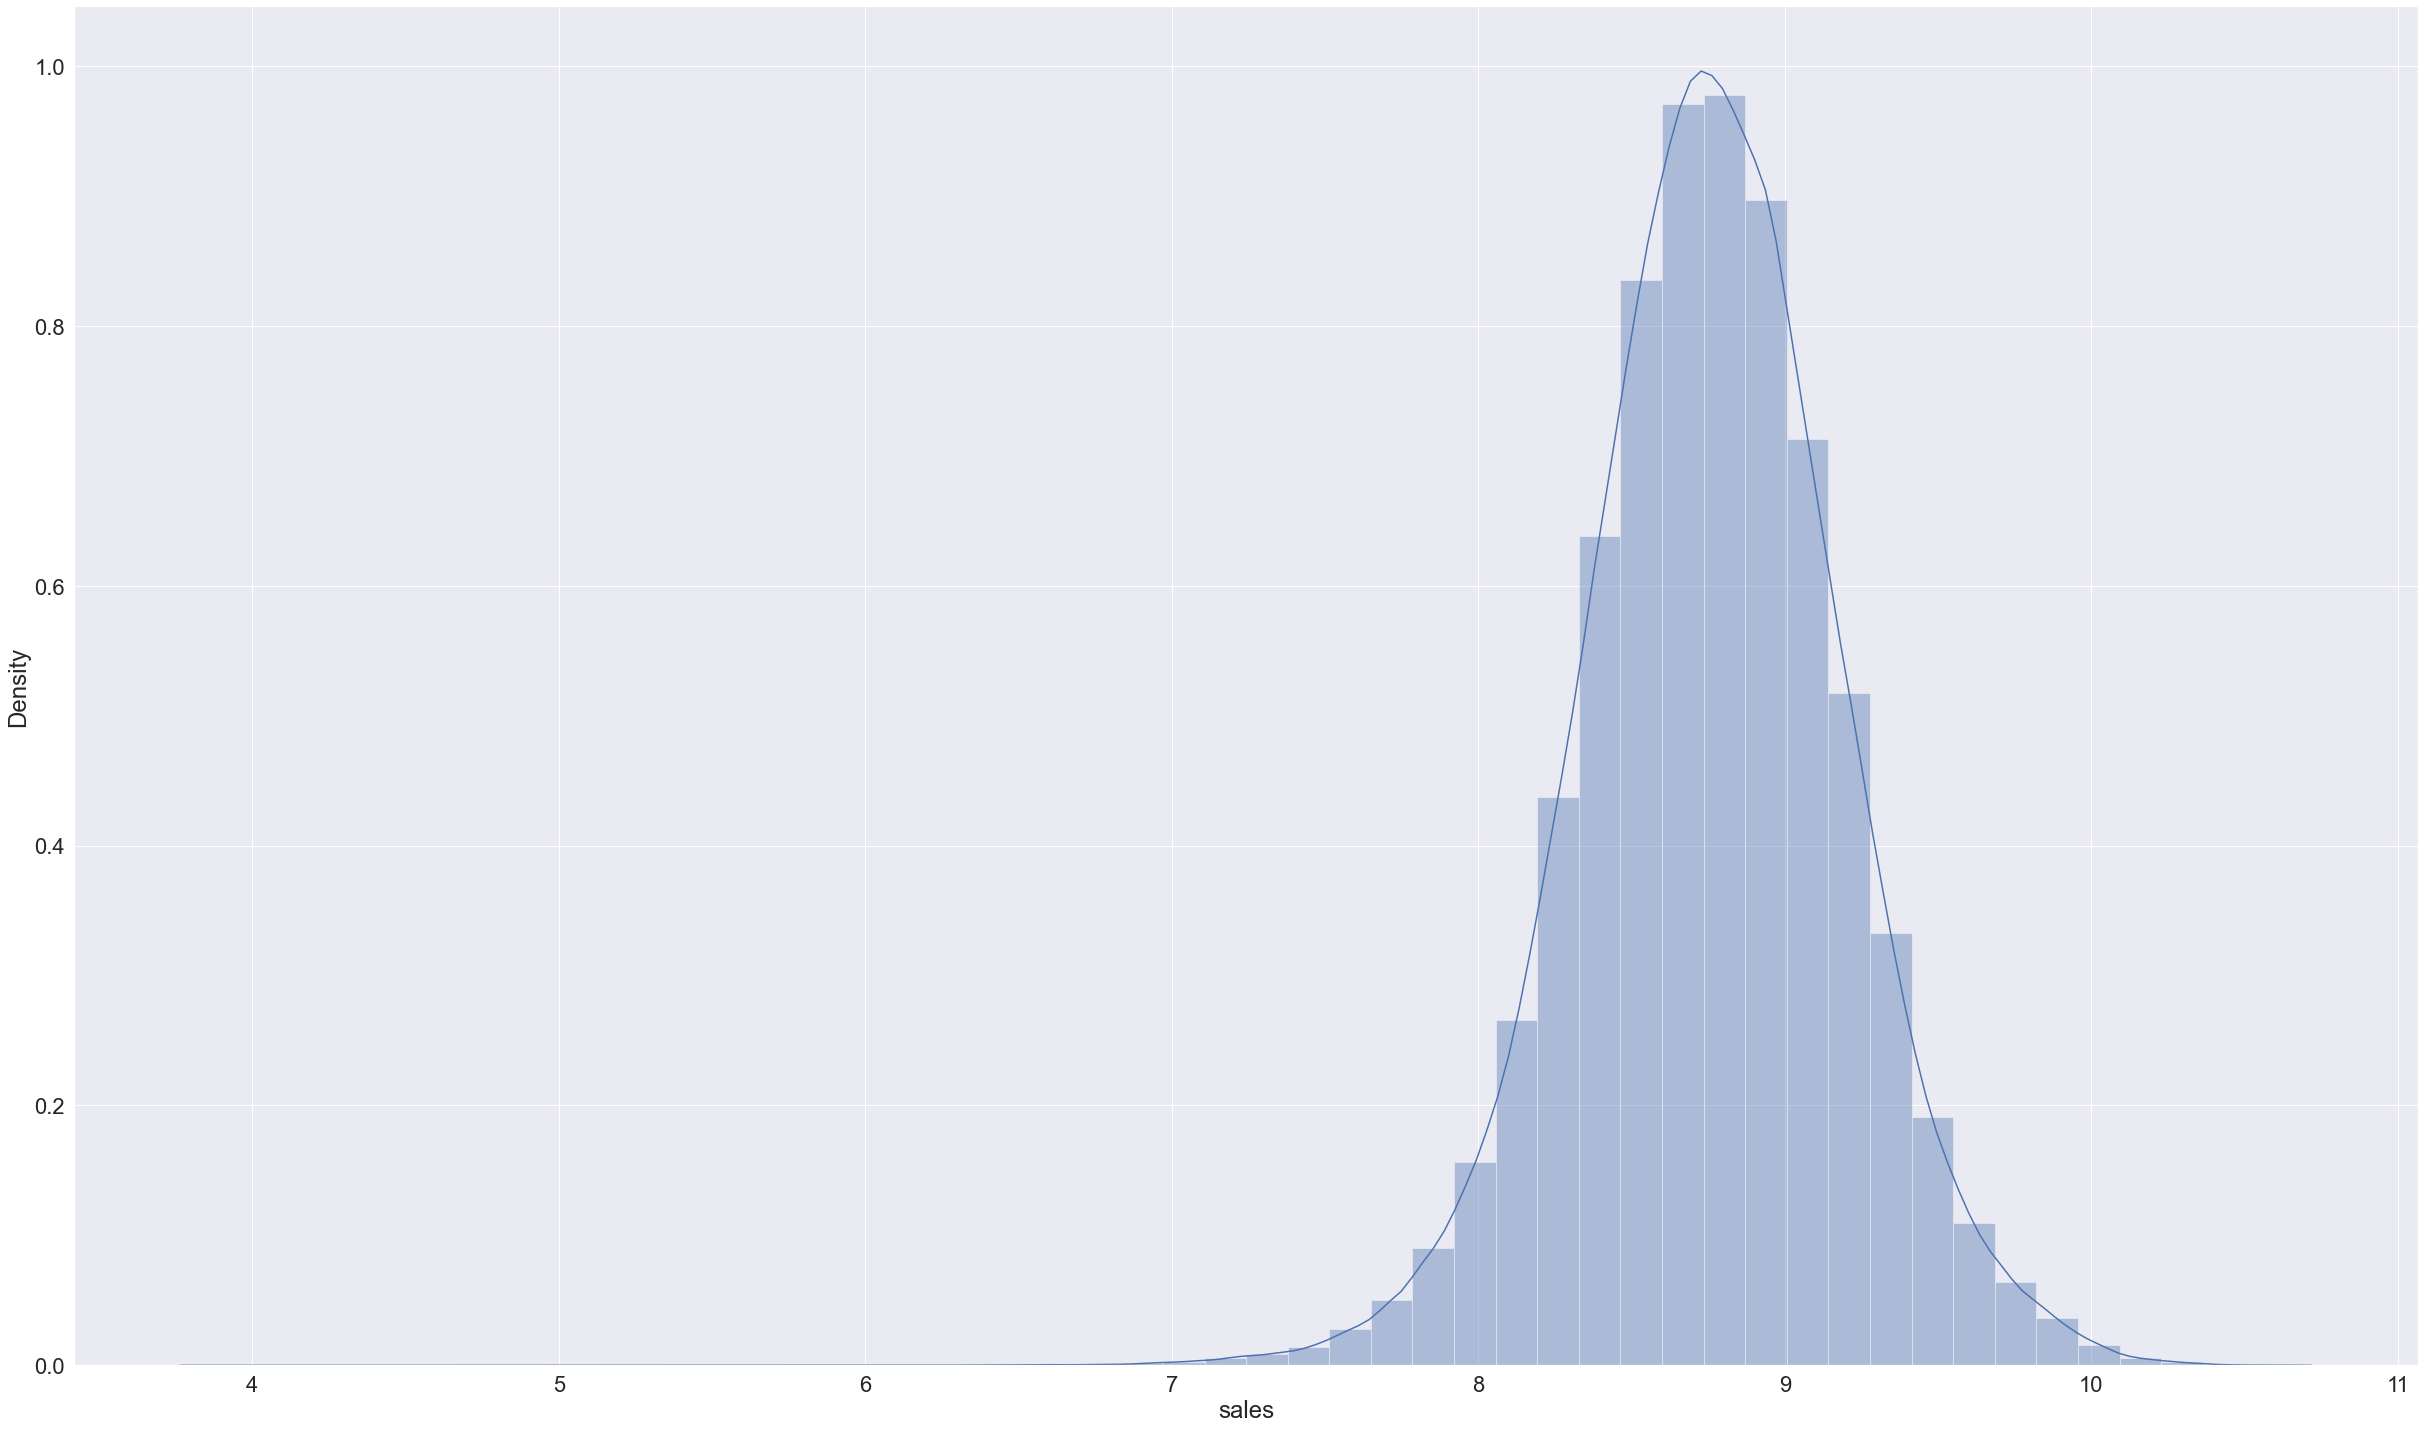

In [35]:
sns.distplot(np.log1p(df4['sales']))

### 4.1.2. Numerical Variable

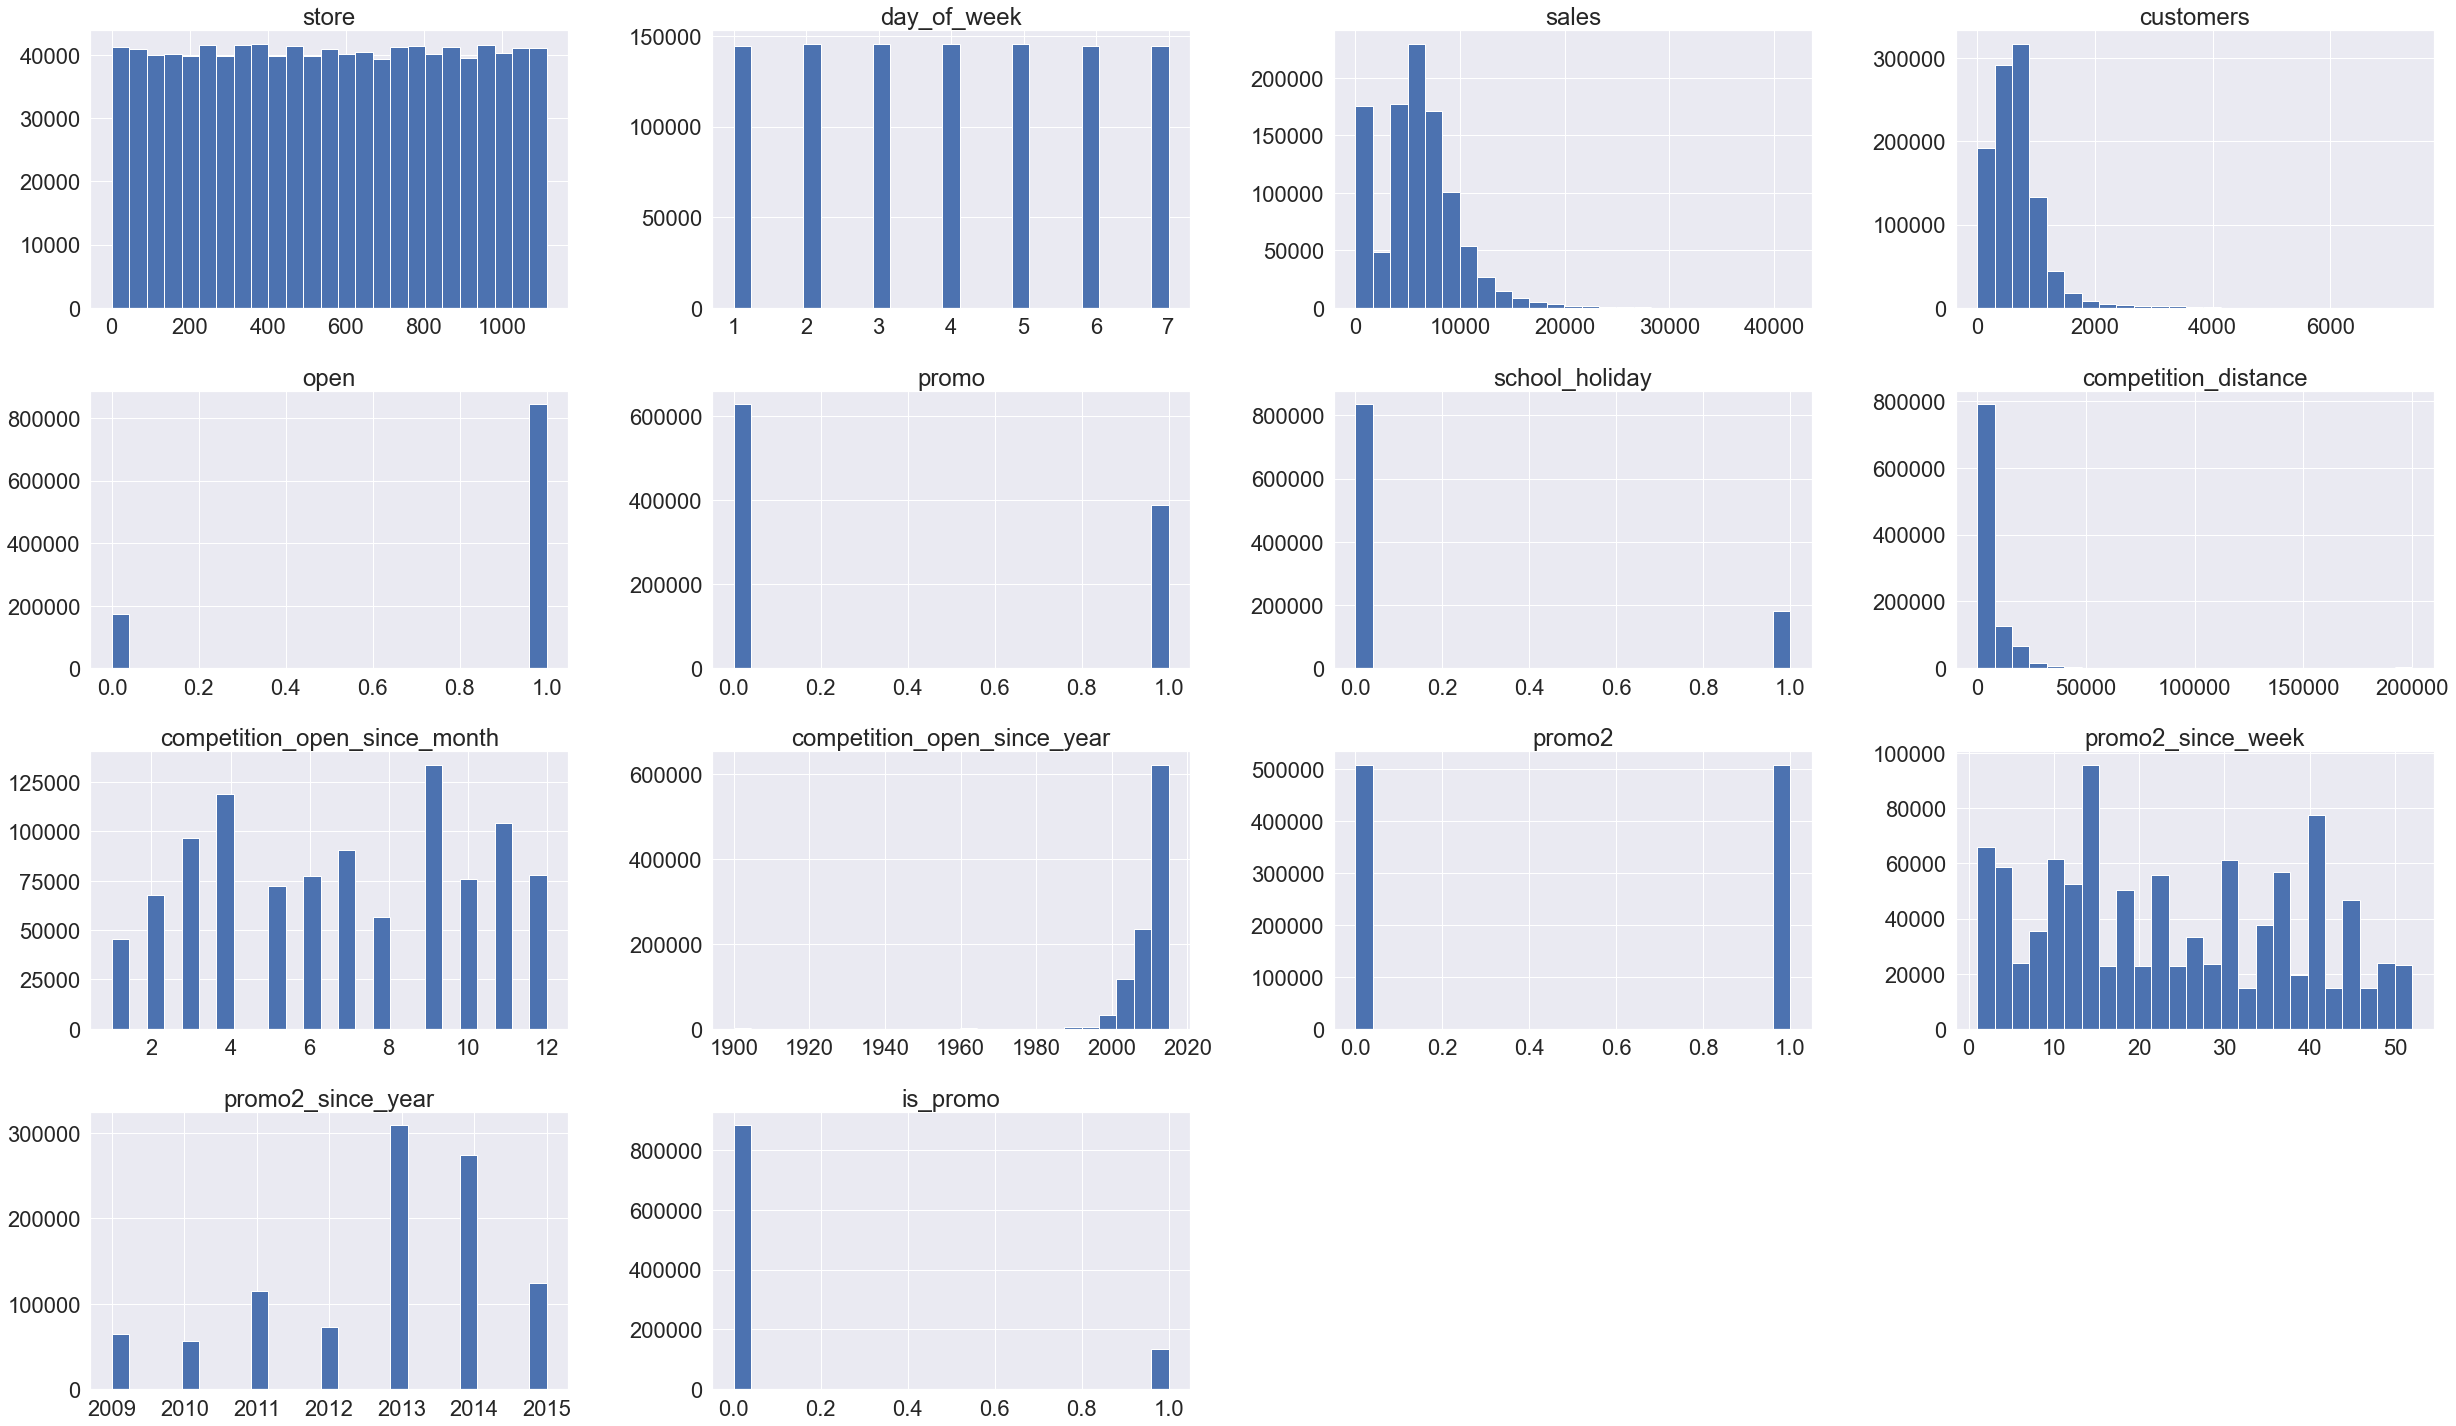

In [36]:
num_attributes.hist(bins= 25);

### 4.1.3. Categorical Variable

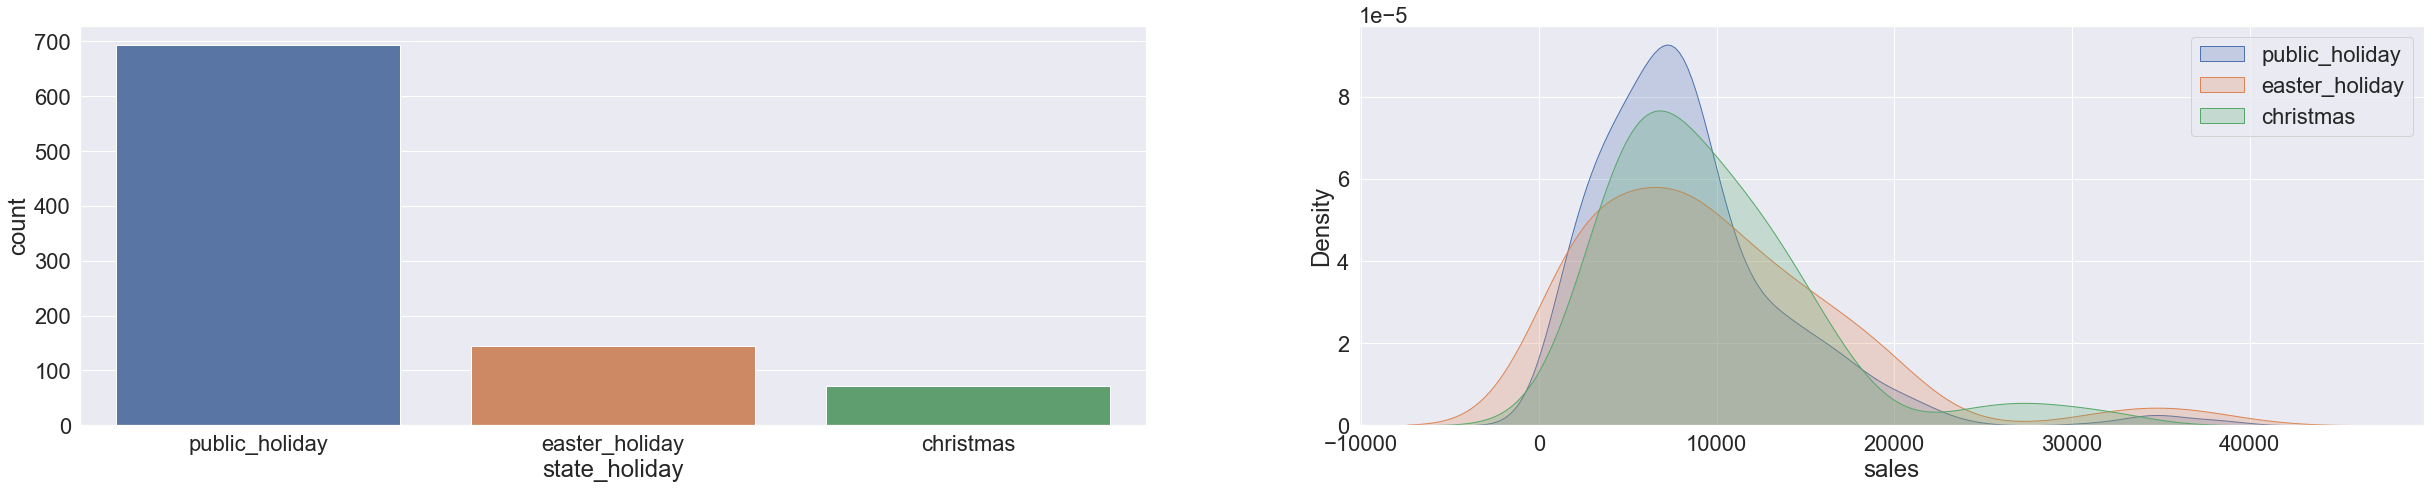

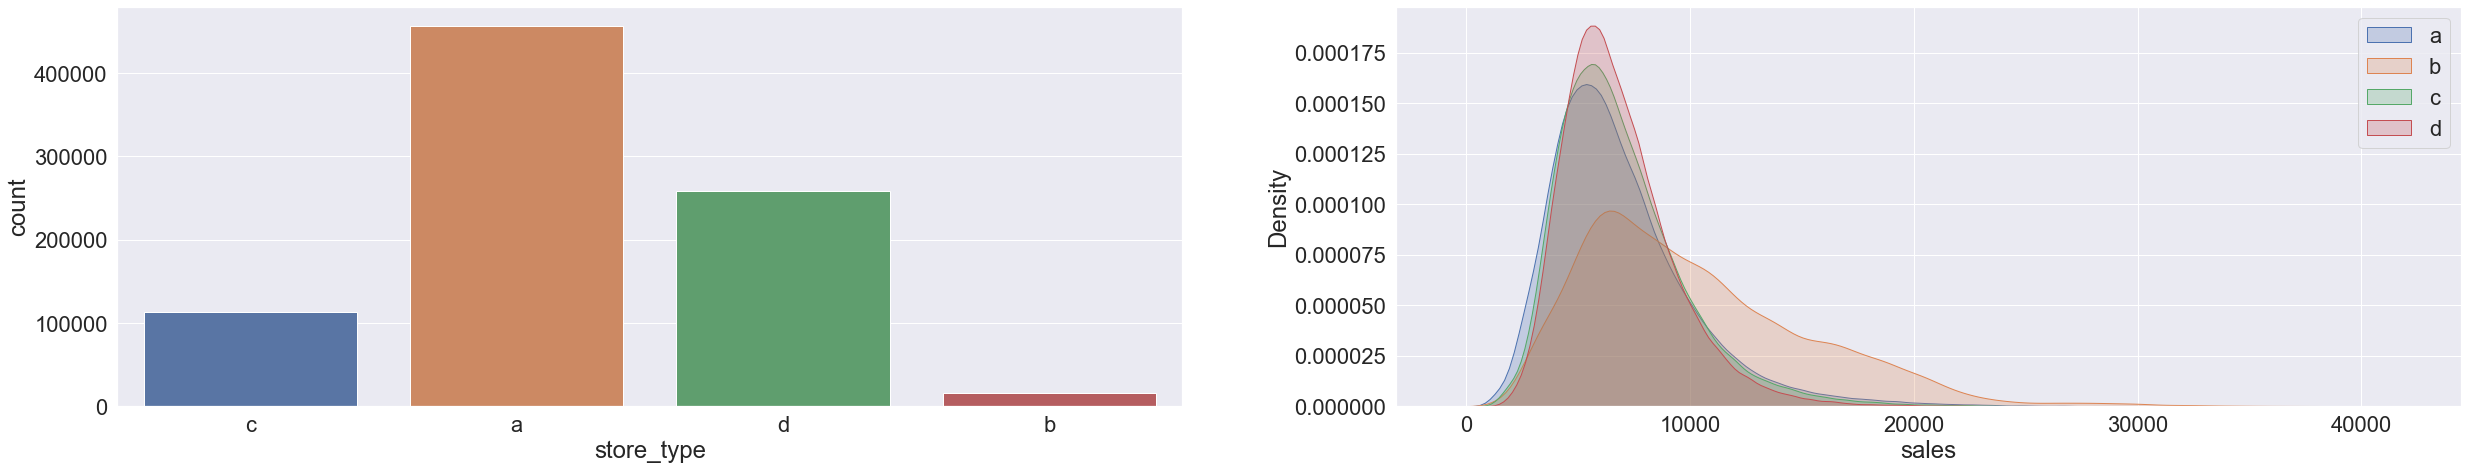

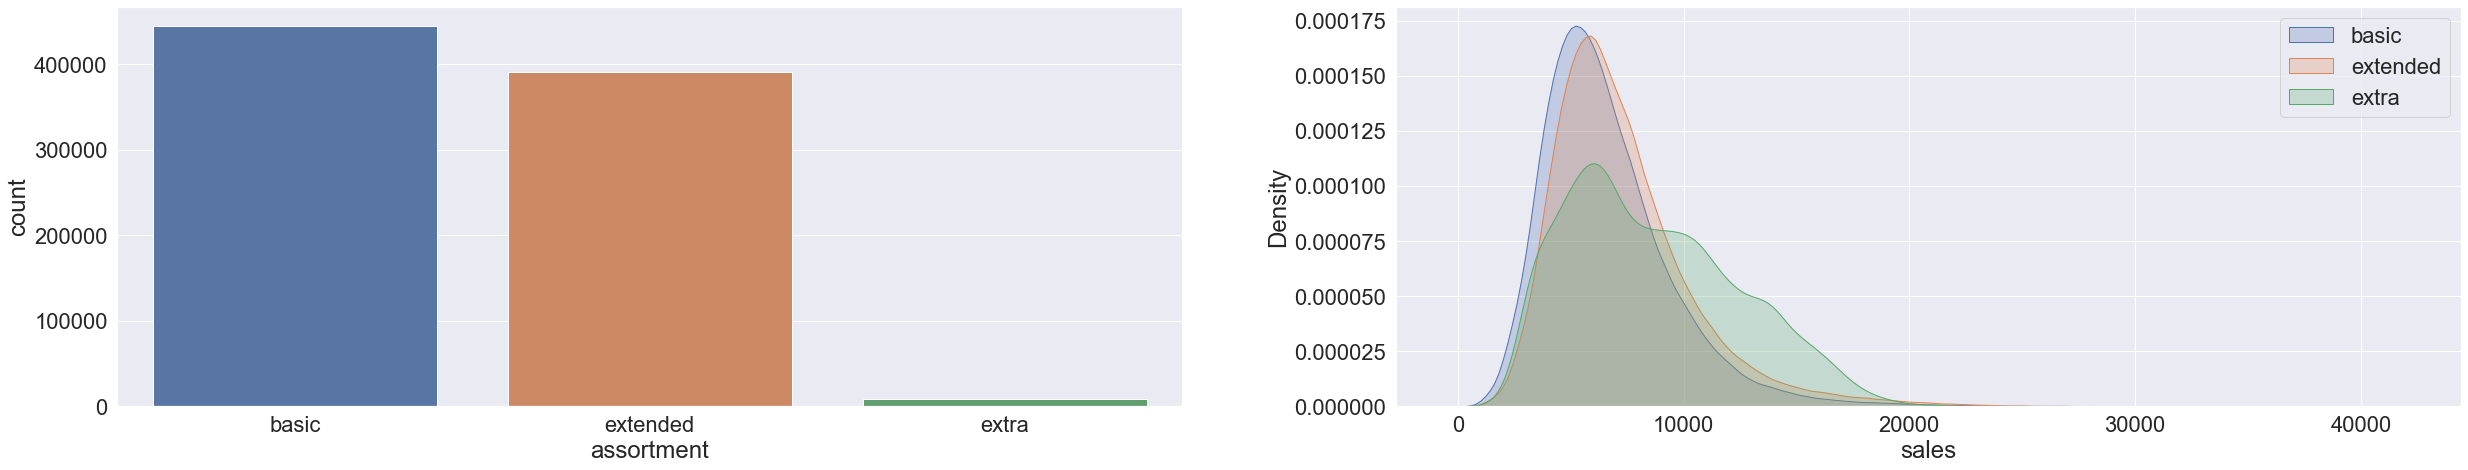

In [38]:
#state_holiday
plt.subplot(3 , 2 , 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3 , 2 , 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'] , label ='public_holiday', shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'] , label ='easter_holiday', shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'] , label ='christmas', shade = True)

plt.legend()
plt.show()

#store_type
plt.subplot(3 , 2 , 3)
sns.countplot(df4['store_type'])

plt.subplot(3 , 2 , 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'] , label ='a', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'] , label ='b', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'] , label ='c', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'] , label ='d', shade = True)

plt.legend()
plt.show()


#assortment
plt.subplot(3 , 2 , 5)
sns.countplot(df4['assortment'])

plt.subplot(3 , 2 , 6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'] , label ='basic', shade = True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'] , label ='extended', shade = True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'] , label ='extra', shade = True)

plt.legend()
plt.show()


## 4.2. Analise Bivariada

#### **H1.** Lojas com maior sortimento deveriam vender mais.
***False*** -  Lojas com MAIOR SORTIMENTO vendem MENOS.




In [42]:
df4['assortment'].value_counts(normalize=True)

basic      0.53
extended   0.46
extra      0.01
Name: assortment, dtype: float64

In [44]:
(df4
 .groupby('assortment')
 .agg({'sales':'sum'})/df4['sales'].sum()*100).reset_index()

,assortment,sales
0,basic,50.16
1,extended,48.64
2,extra,1.21


<AxesSubplot:xlabel='year_week'>

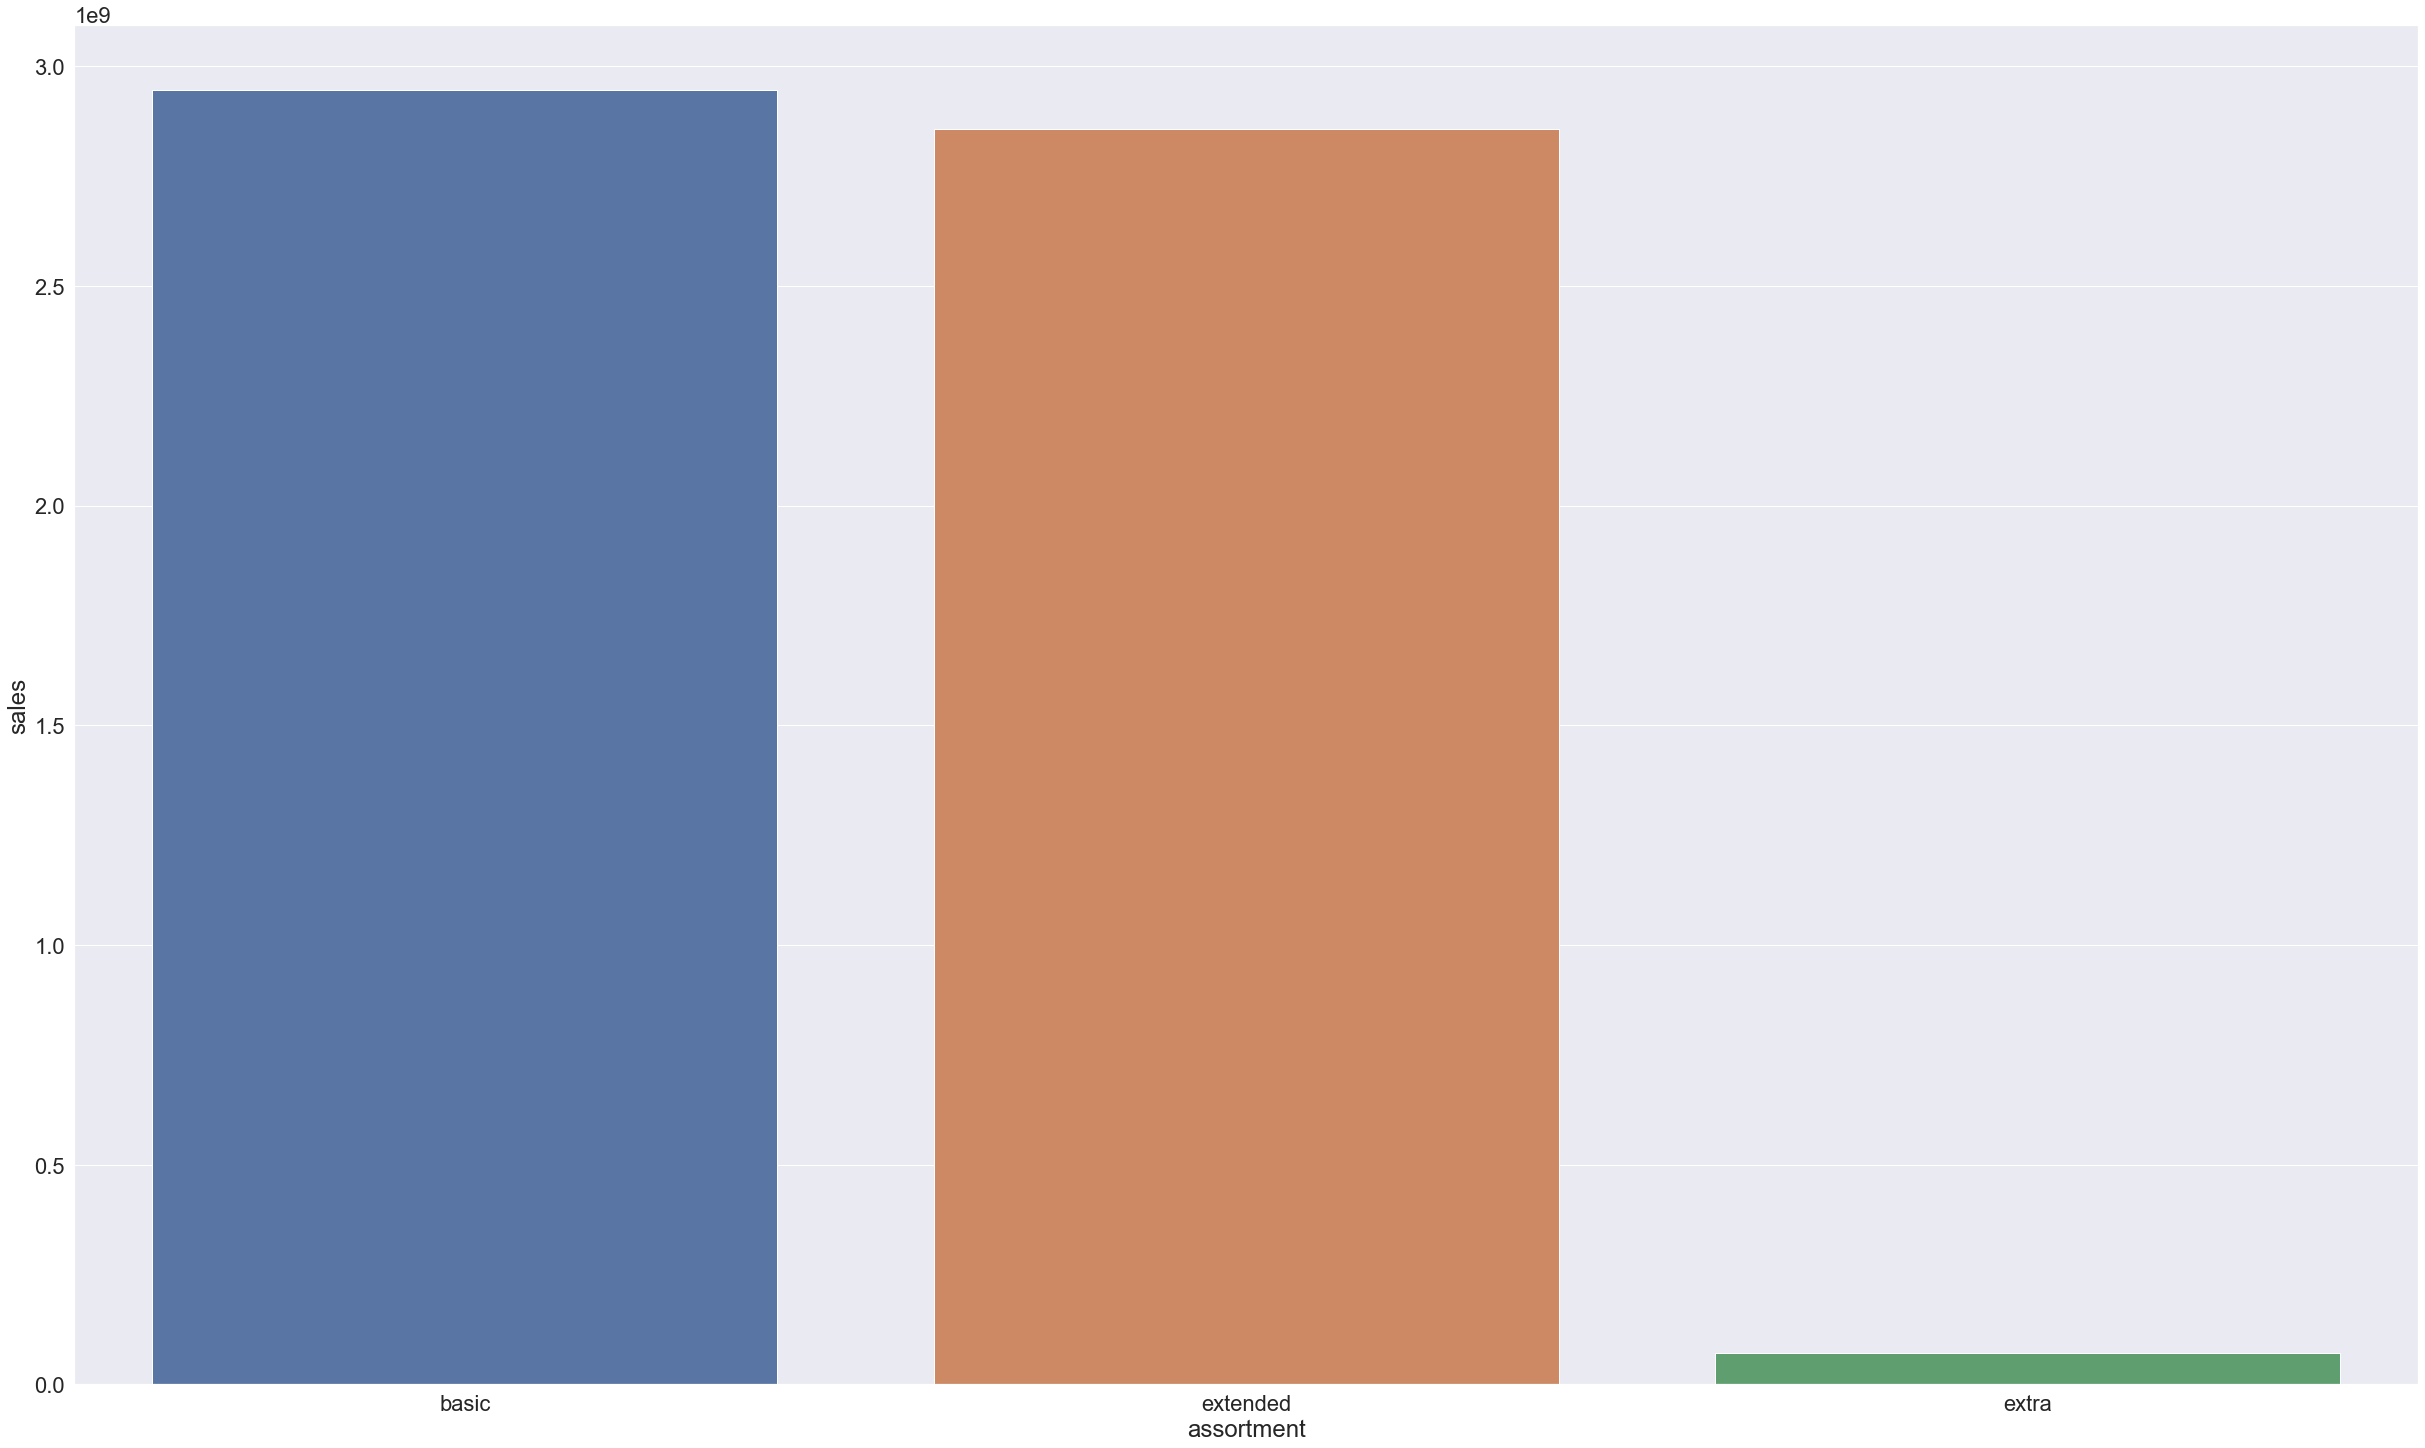

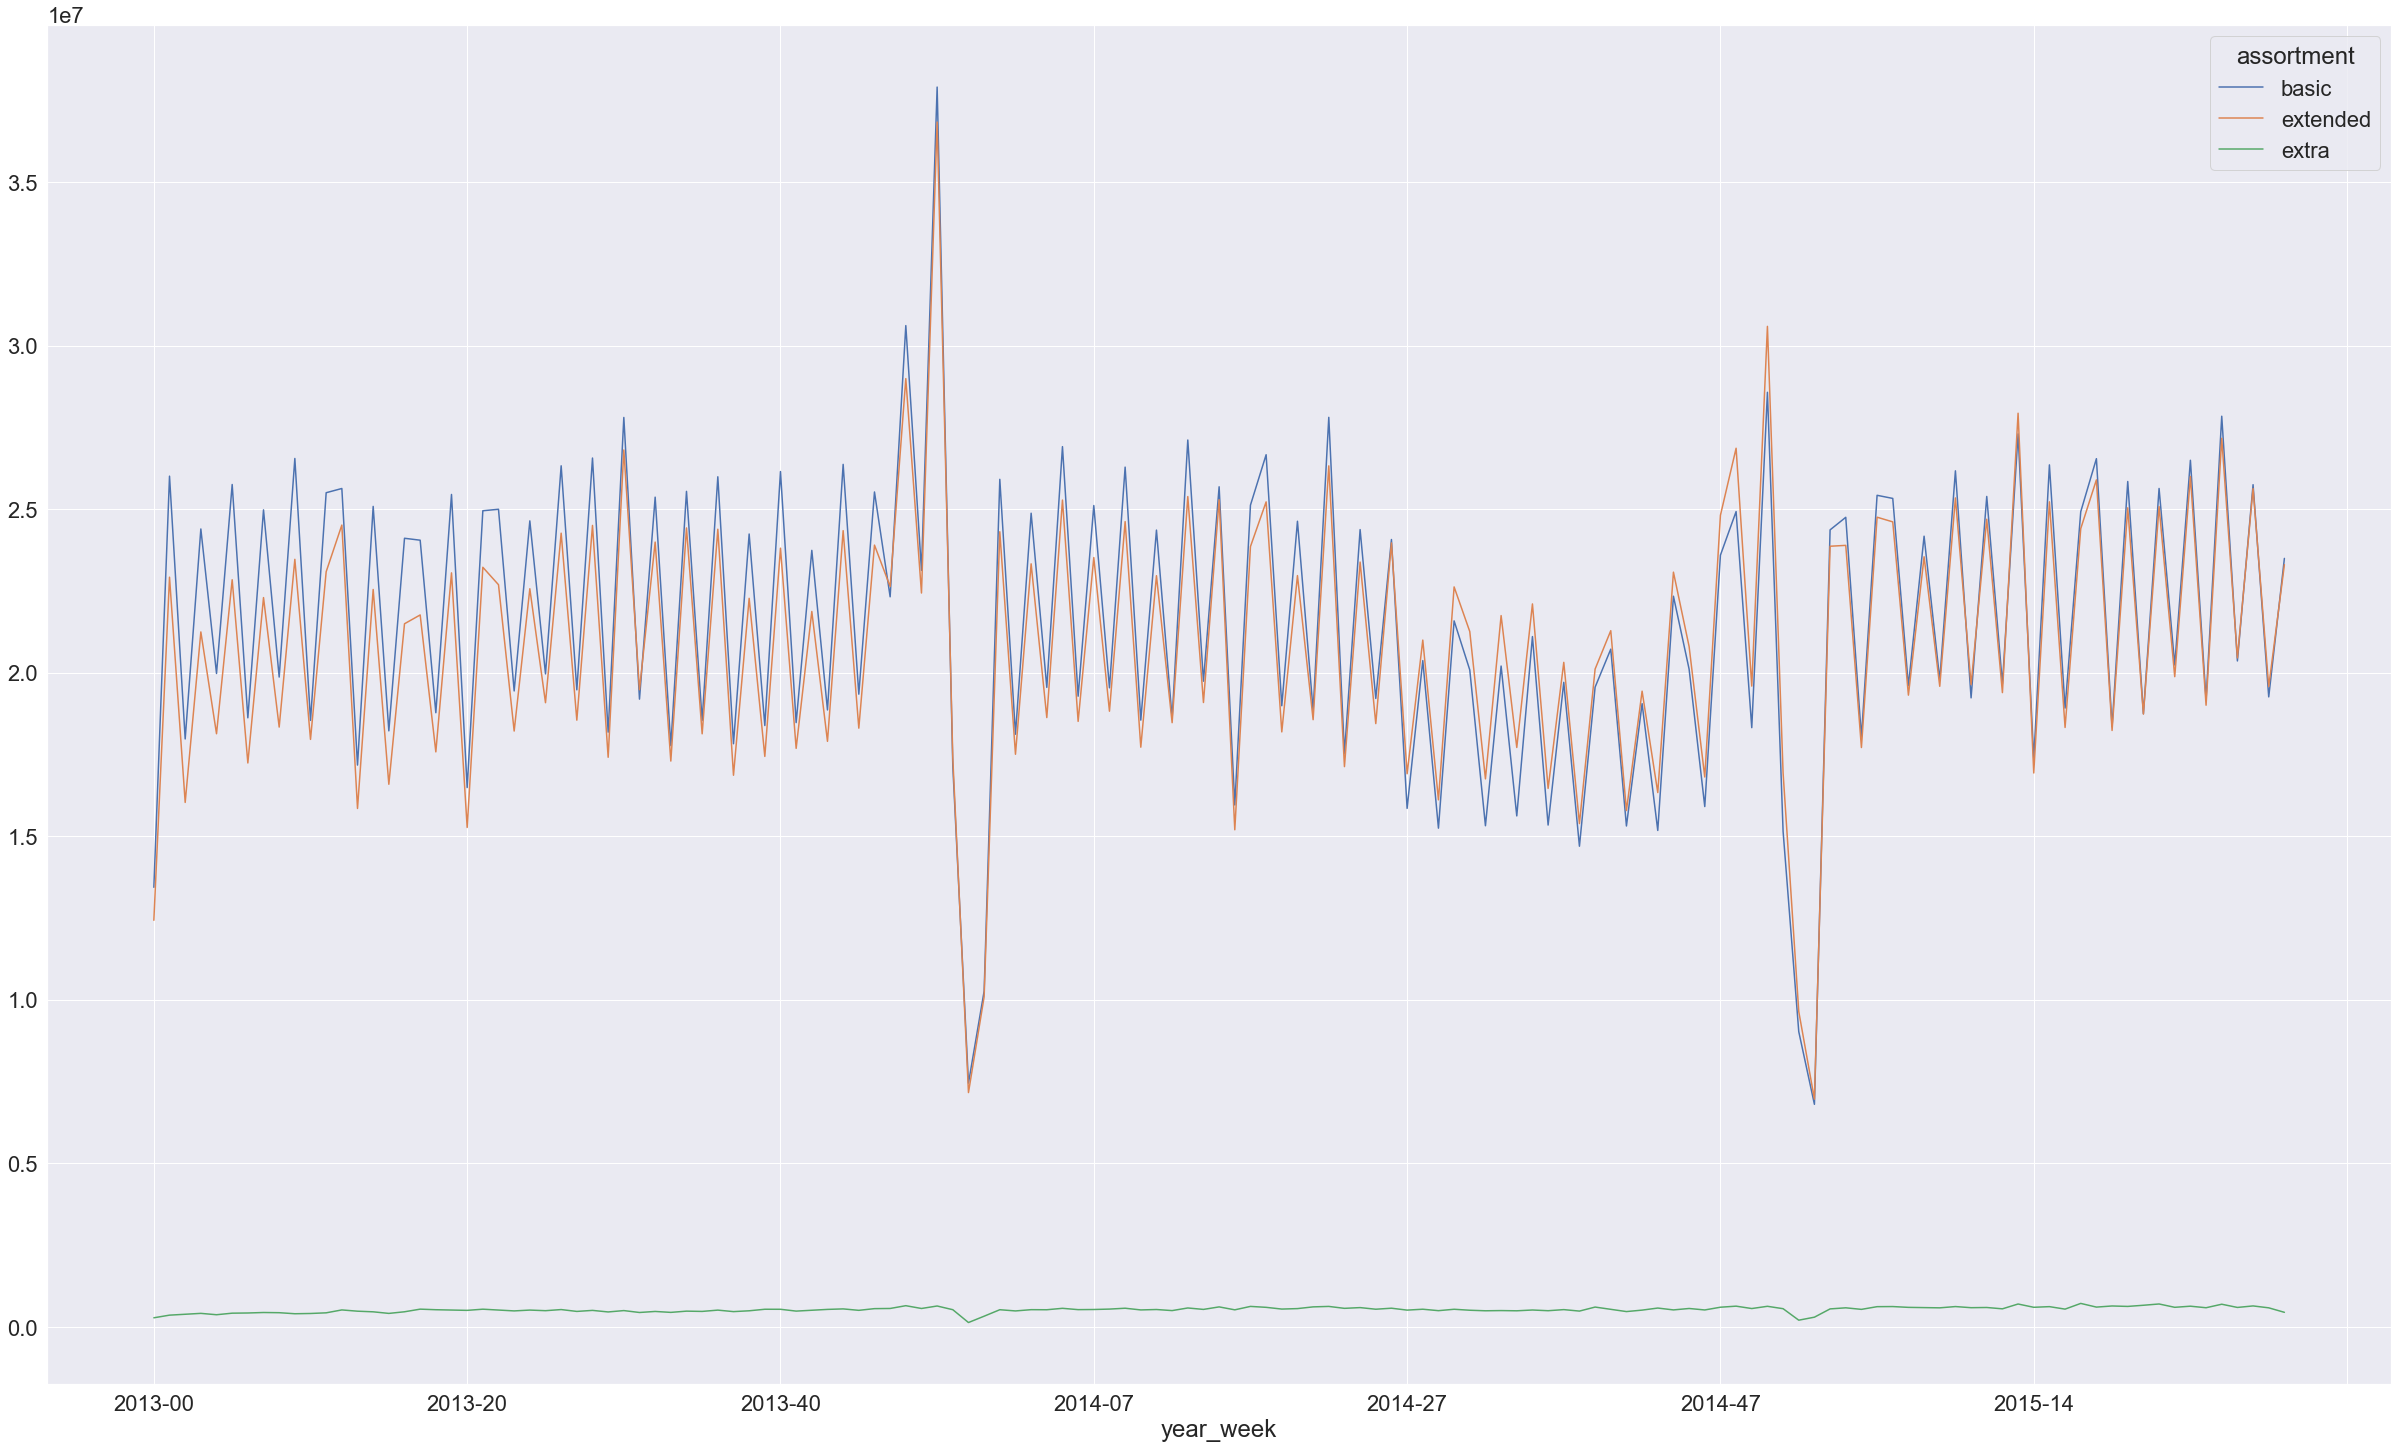

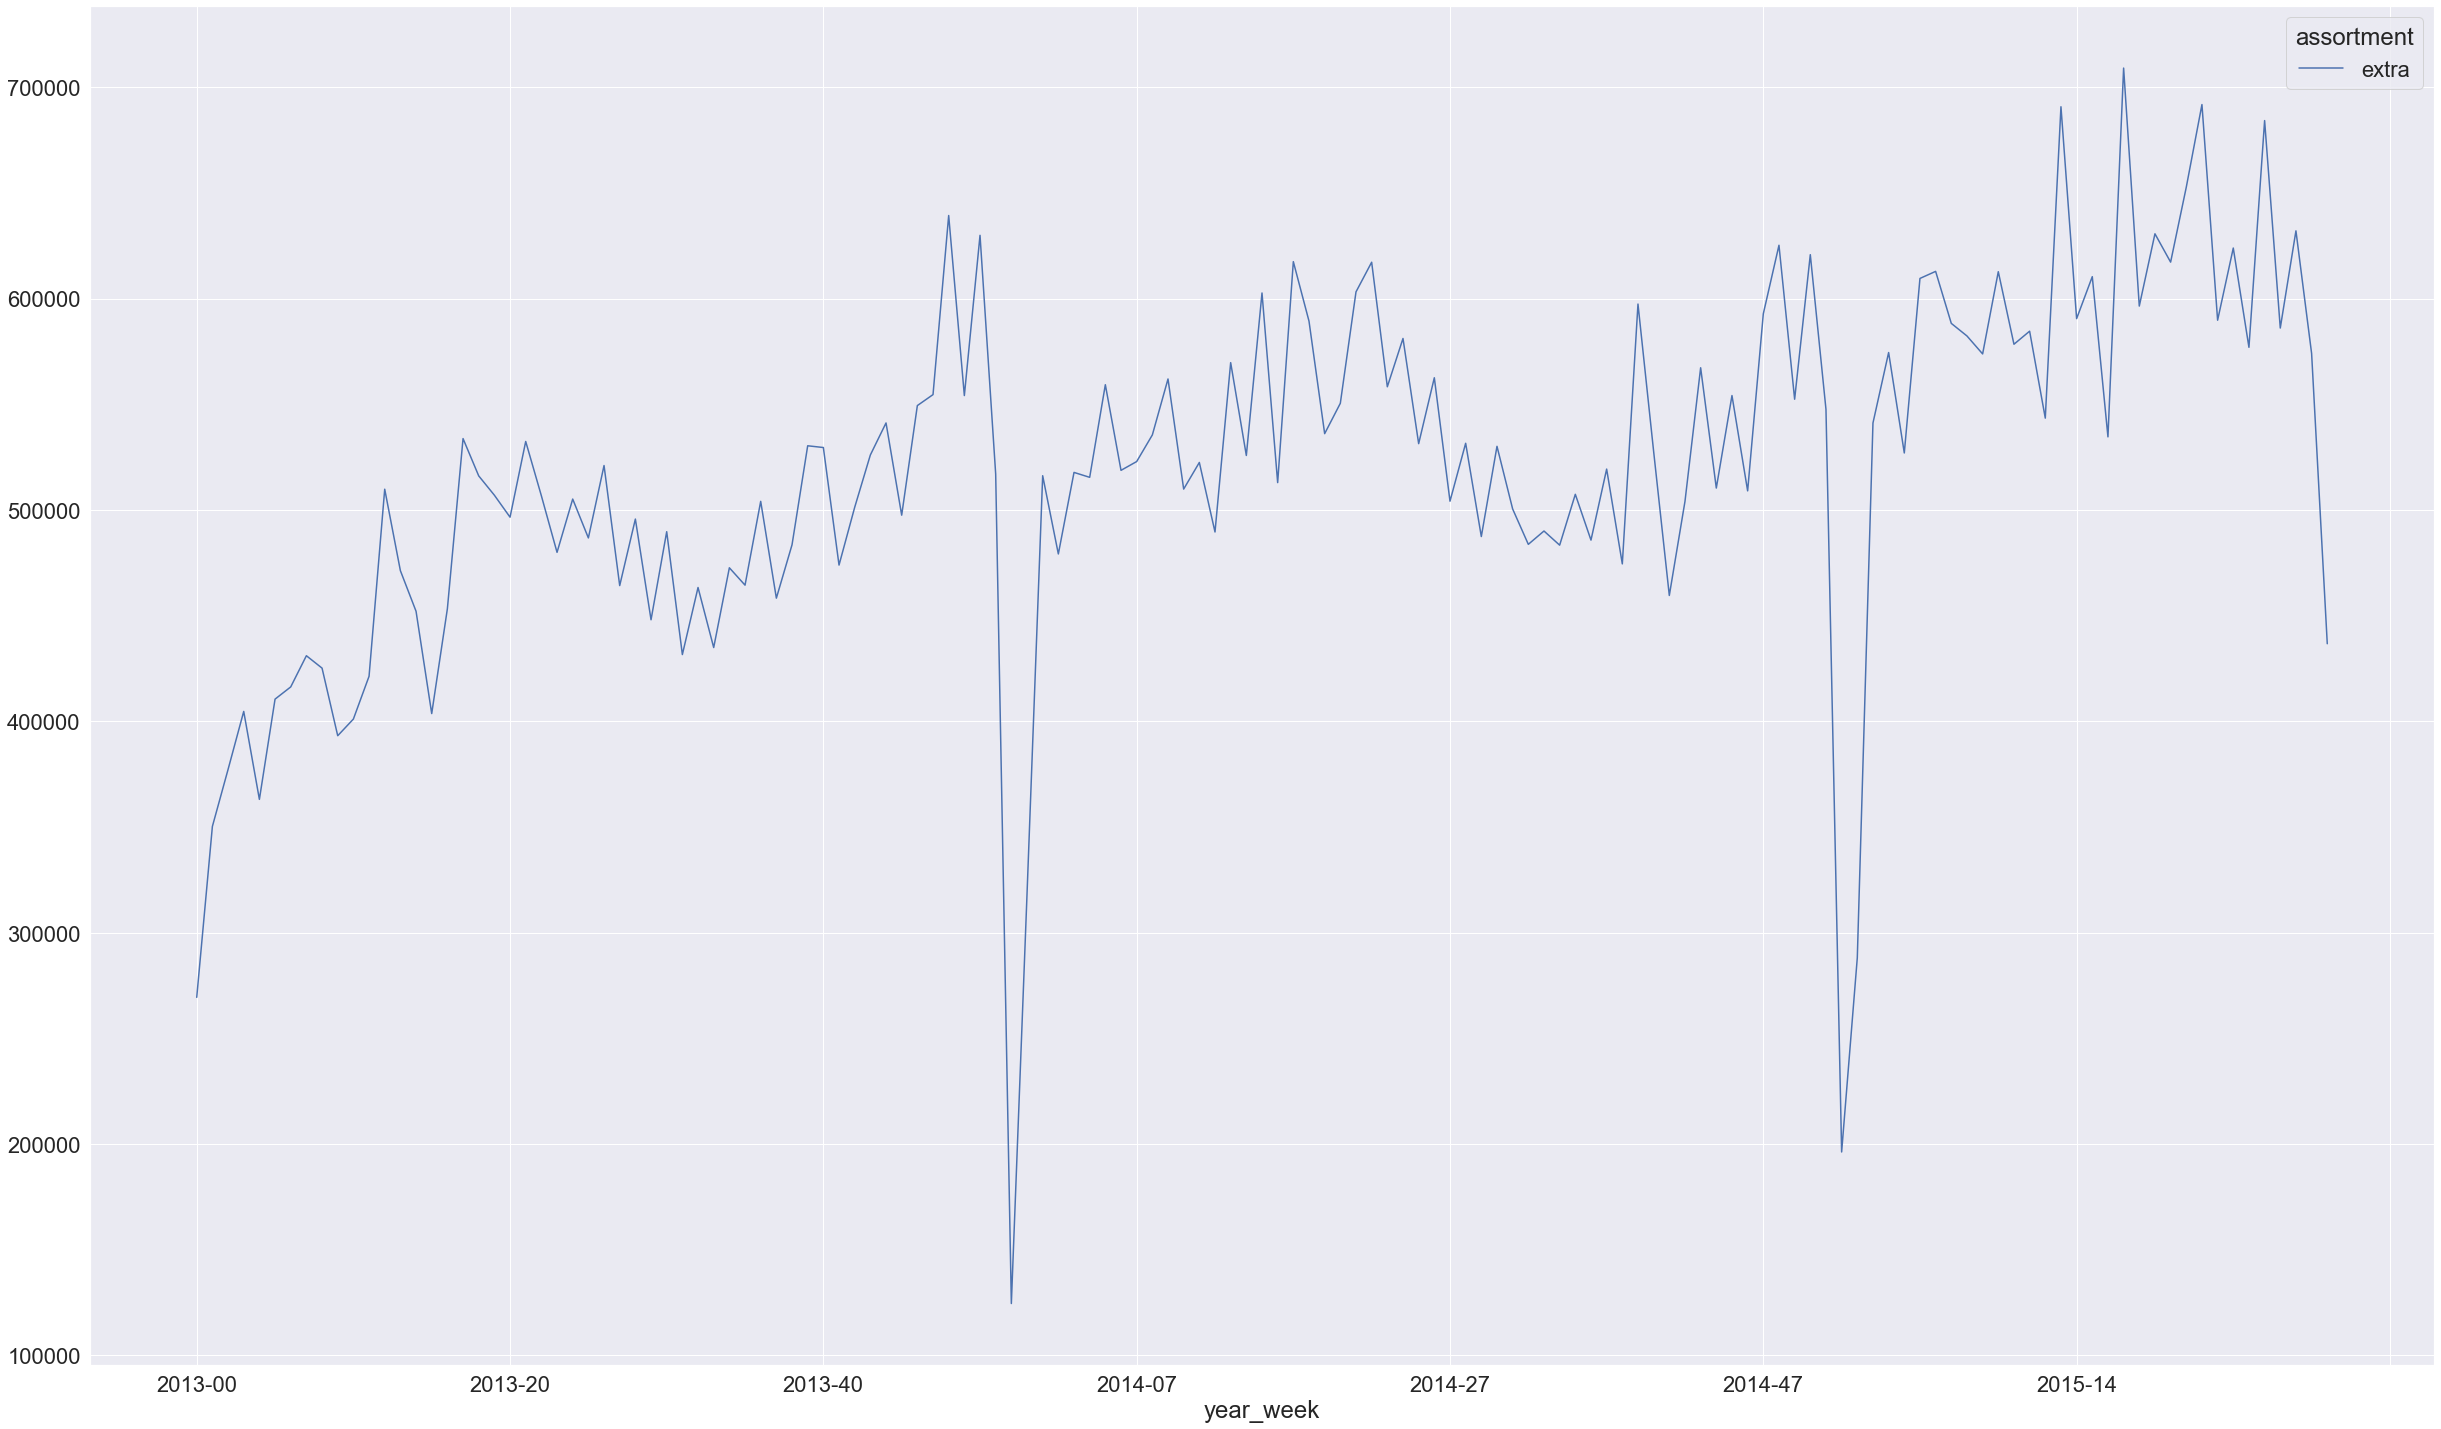

In [39]:
aux1 = df4[['assortment' , 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x = 'assortment' , y = 'sales' , data = aux1);

aux2 = df4[['year_week','assortment' , 'sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot(index = 'year_week' , columns= 'assortment' , values= 'sales').plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index = 'year_week' , columns= 'assortment' , values= 'sales').plot()


#### **H2.** Lojas com competidores proximos deveriam vender menos.
***False*** -  Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS.


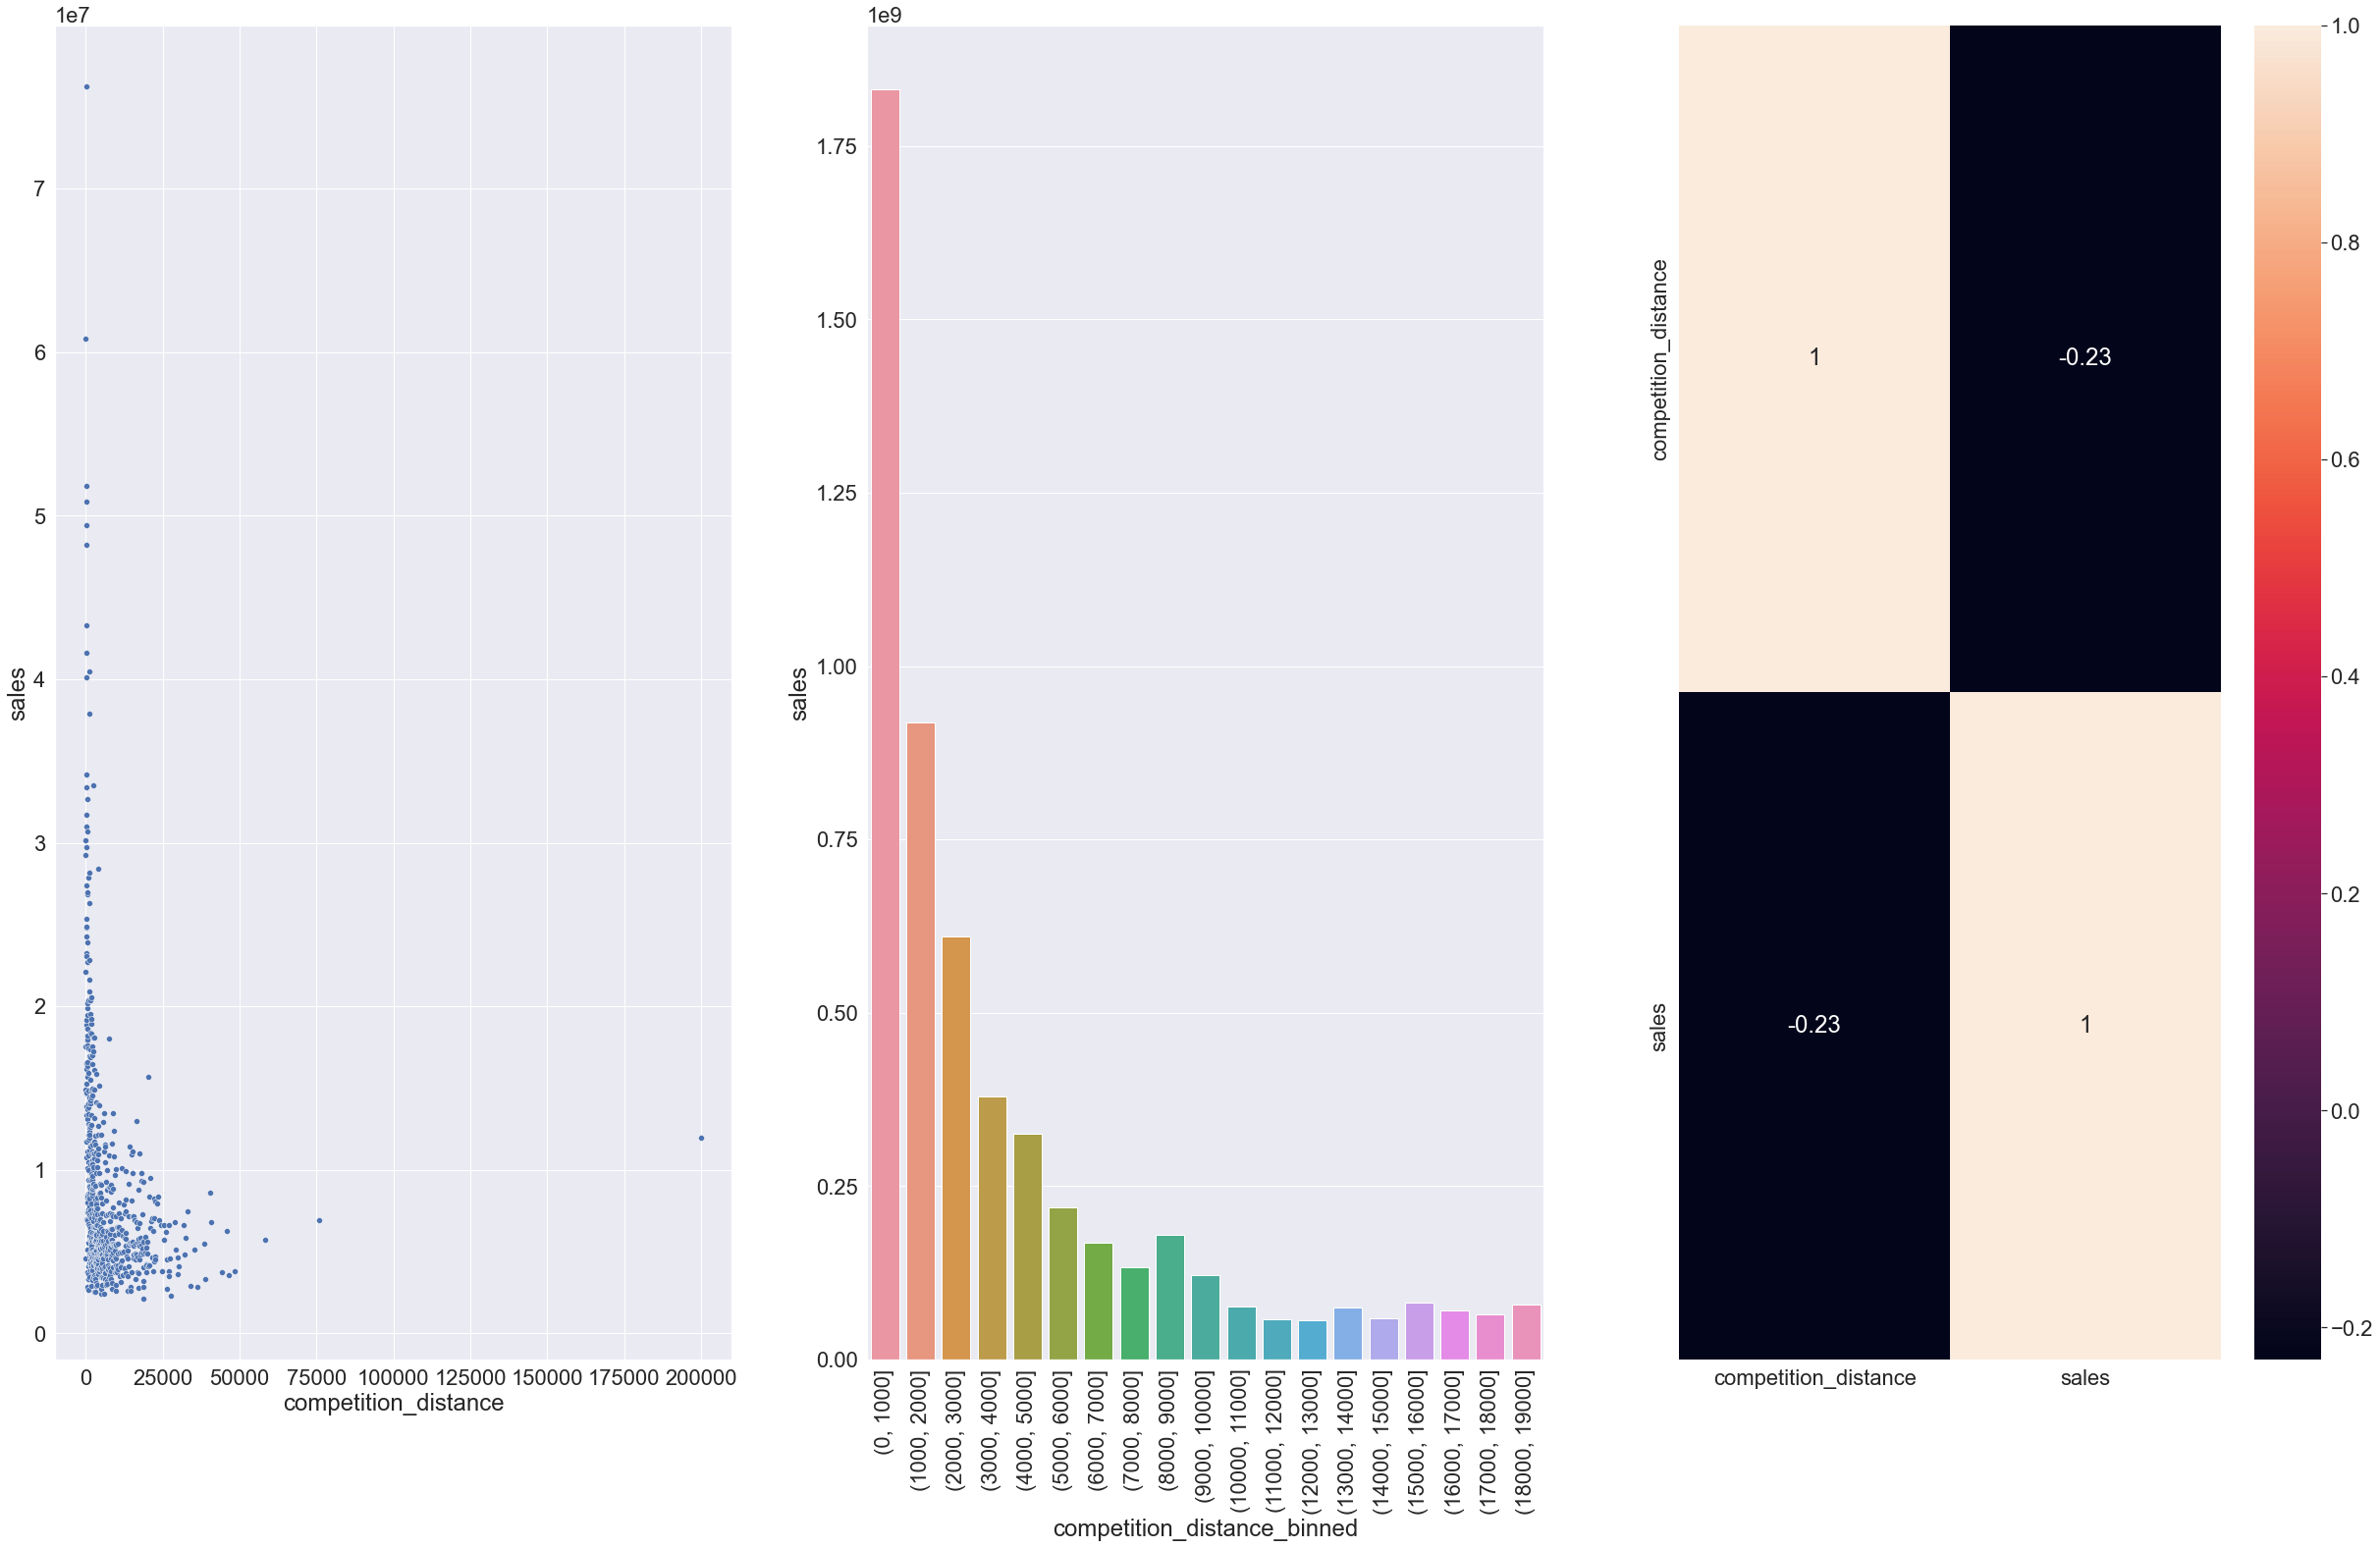

In [47]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1 , 3 , 1)
sns.scatterplot(x = 'competition_distance' , y = 'sales' , data=aux1);

plt.subplot(1 , 3 , 2)
bins = list(np.arange(0 ,20000 , 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'],bins=bins)
aux2 =aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x ='competition_distance_binned',y='sales', data=aux2)
plt.xticks(rotation=90)

plt.subplot(1 , 3 , 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

#### **H3.** Lojas com competidores à mais tempo deveriam vender mais.
***False*** -  Lojas com COMPETIDORES PROXIMOS À MAIS TEMPO vendem MENOS.


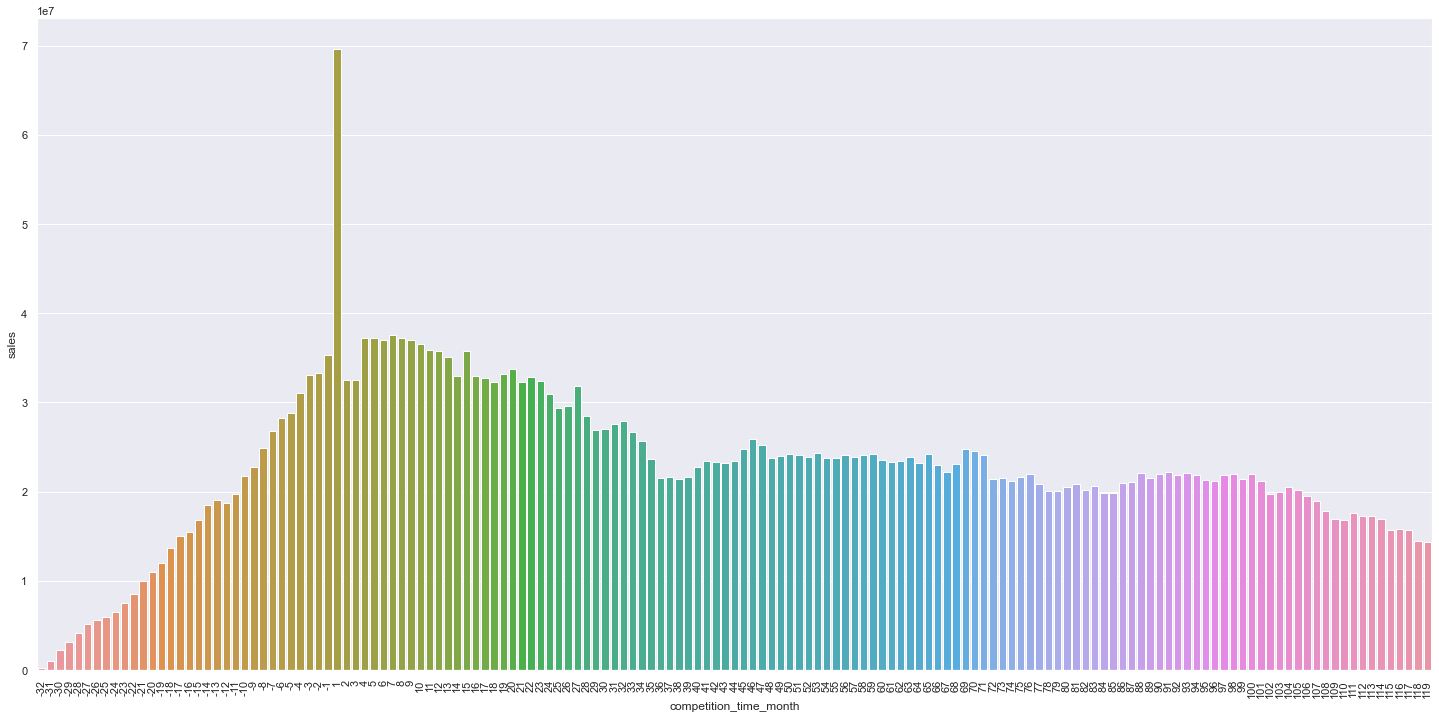

In [97]:
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2=aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot(x ='competition_time_month',y='sales', data=aux2)
plt.xticks(rotation=90);


<AxesSubplot:>

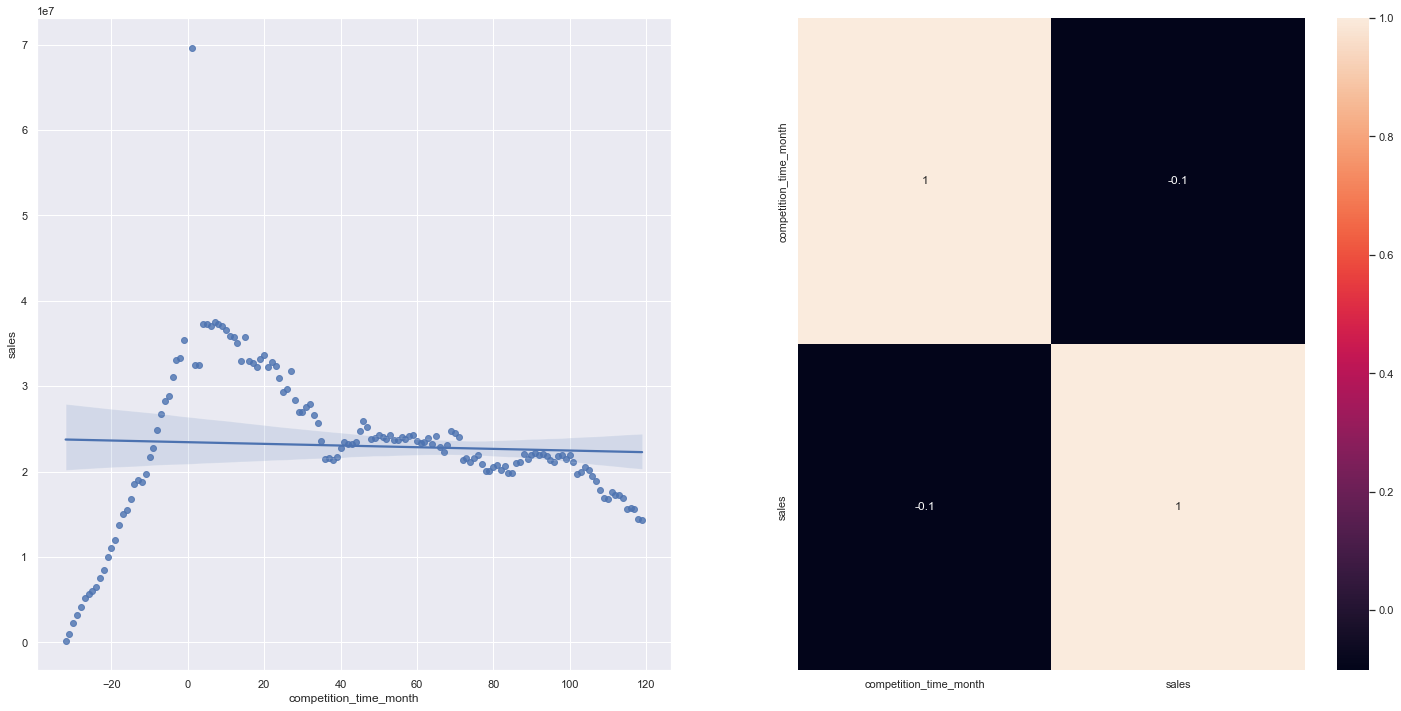

In [96]:
plt.subplot(1,2,1)
sns.regplot(x ='competition_time_month',y='sales', data=aux2)

plt.subplot(1,2,2)
sns.heatmap(aux1.corr(method='pearson'),annot=True)

#### **H4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

***False*** -  Lojas com PROMOCOES ATIVAS À MAIS TEMPO vendem MENOS num certo periodo de promocao.




<AxesSubplot:>

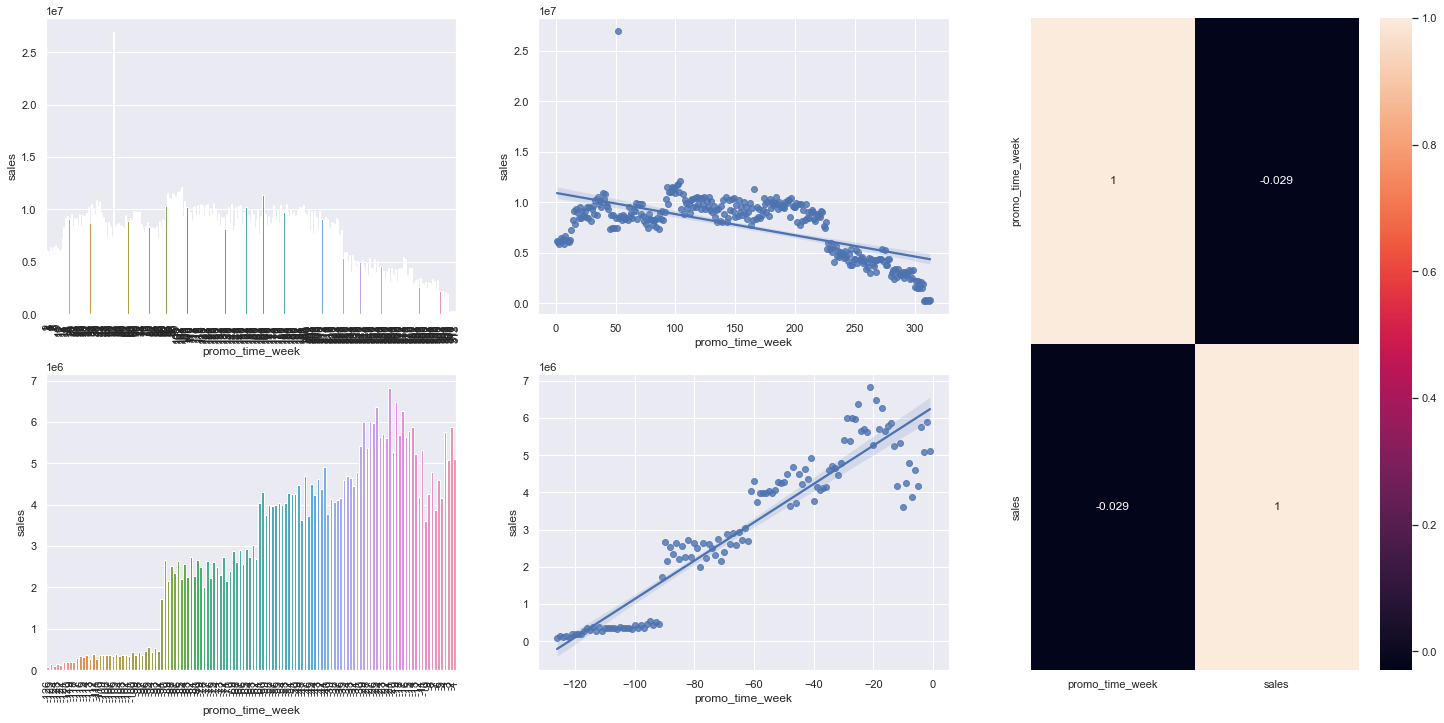

In [119]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

grid = plt.GridSpec(2,3)

plt.subplot(grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0] # promocao extendida
sns.barplot(x = 'promo_time_week' , y = 'sales', data = aux2  )
plt.xticks(rotation = 90);

plt.subplot(grid[0,1])
sns.regplot(x = 'promo_time_week' , y = 'sales', data = aux2  )

plt.subplot(grid[1,0])
aux3 = aux1[aux1['promo_time_week'] < 0] # promocao regular
sns.barplot(x = 'promo_time_week' , y = 'sales', data = aux3 )
plt.xticks(rotation = 90);

plt.subplot(grid[1,1])
sns.regplot(x = 'promo_time_week' , y = 'sales', data = aux3  )

plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot=True)

#### <s>**H5.** Lojas com mais dias de promoções deveriam vender mais.</s>


#### **H6.** Lojas com mais promoções consecutivas deveriam vender mais.

***False*** -  Lojas com MAIS PROMOCOES CONSECUTIVAS vendem MENOS.

In [121]:
df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


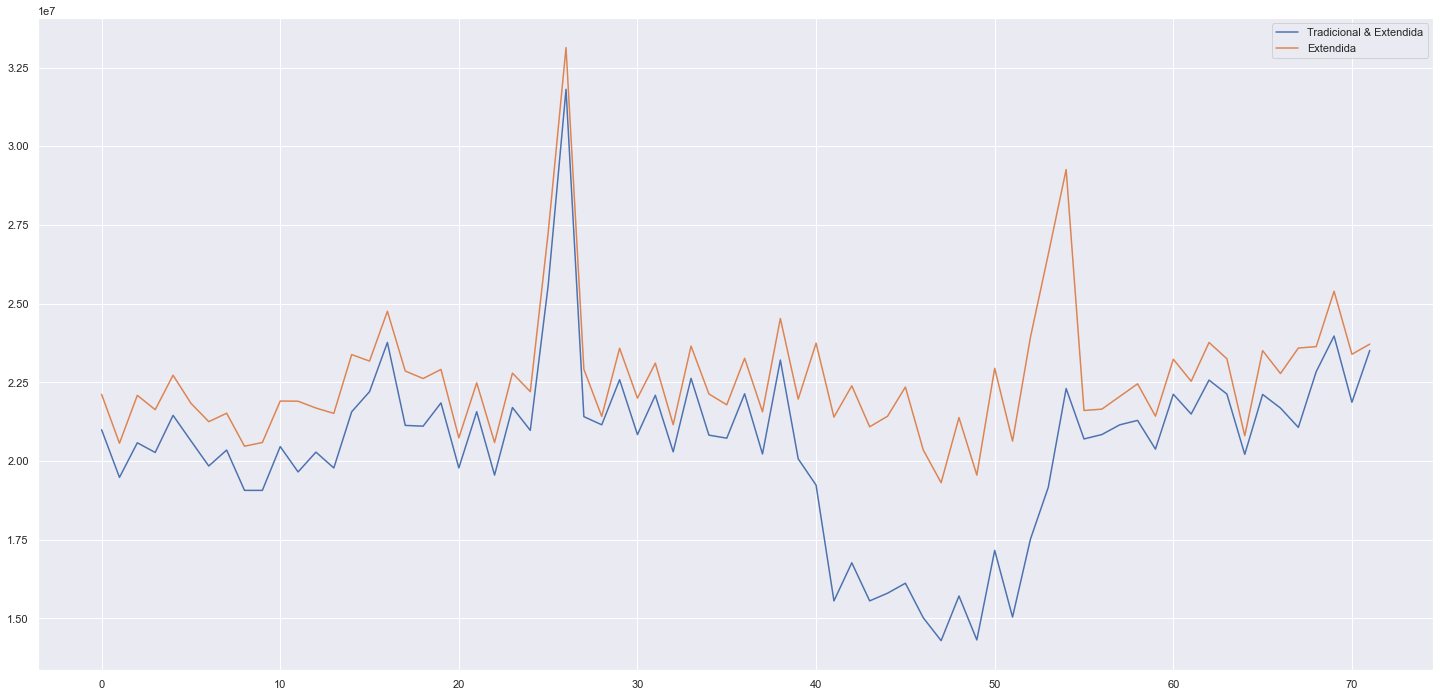

In [124]:
aux1 = df4[(df4['promo'] == 1 ) & (df4['promo2'] == 1 )][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0 )][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax = ax)

ax.legend(labels=['Tradicional & Extendida','Extendida'])

#### **H7.** Lojas abertas durante feriado de Natal deveriam vender menos.


#### **H8.** Lojas deveriam vender mais ao longo do ano.






#### **H9.** Lojas deveriam vender mais no segundo semetre do ano.


#### **H10.** Lojas deveriam vender mais depois do dia 10 de cada mês.


#### **H11.** Lojas deveriam vender mais aos finais de semana.


#### **H12.** Lojas deveriam vender menos durante feriados escolares.


## 4.3. Analise Multivariada